<a href="https://colab.research.google.com/github/hinton024/Assignment-2-Social-media-and-network-analytics/blob/main/Youtube_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download necessary libraries

In [6]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.4 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=ee3701e8009bd71057c95632e812dfcac881f44327610819c950728d9cf9b1ca
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [7]:
import pandas as pd
import re
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import nltk
from langdetect import detect, LangDetectException
import contractions
from collections import Counter

In [8]:
# List of NLTK data packages to download
nltk_packages = ['punkt', 'wordnet', 'stopwords']

# Download each package
for package in nltk_packages:
    nltk.download(package)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Importing the Neccessary Libraries

In [9]:
import pandas as pd
import re
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import nltk
from langdetect import detect, LangDetectException
import contractions
from collections import Counter

### 1. Data Preprocessing
#### Loading the Data

In [10]:
with open('DB_youtube.json', 'r', encoding='utf-8') as file:
    youtube = json.load(file)

# Converting the data into a DataFrame
df = pd.DataFrame(youtube)
df.head()


,Title,Video ID,Published at,Description,Category ID,Comment Count,Comments
0,10 ICONIC David Beckham goals you'll NEVER forget,oTpTVqJX8ho,2023-12-11T16:01:00Z,10 of the best Premier League goals scored by ...,17,627,"[Favourite David Beckham goal?, Goals before I..."
1,"David Beckham SURPRISES Thierry Henry, Jamie C...",wFDSJuqg0Vk,2024-09-17T19:56:02Z,"David Beckham surprised Kate Abdo, Jamie Carra...",17,1822,"[MY HERO!!😂😂😂, As if David lets his mom cut hi..."
2,David Beckham Embraces the Moment While Eating...,igmUnkx0fBw,2024-08-29T15:00:45Z,David Beckham takes on the Hot Ones gauntlet f...,24,4265,[Yet further evidence that David Beckham is on...
3,David Beckham on Spice Girls Reuniting for Vic...,rniYjUoNbOU,2024-05-09T06:00:23Z,"David talks about his honey, owning the Miami ...",23,771,"[Amazing performance mate&#39;s, changed game...."
4,David Beckham sends touching message to MESSI ...,wHE7ZN50WSk,2024-10-04T07:00:12Z,"beckham messi inter miami,beckham messi reacti...",17,34,"[Aquì vuelvo a decirlo, ha sido muy raro que B..."


#### Check for Missing Values

In [11]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values
print("\nMissing Values:")
print(missing_values)


Missing Values:
Title            0
Video ID         0
Published at     0
Description      0
Category ID      0
Comment Count    0
Comments         0
dtype: int64


#### Check for Duplicate Values

In [12]:
# Check for duplicates based on Video ID
duplicates = df.duplicated(subset=['Video ID']).sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df.drop_duplicates(subset=['Video ID'], inplace=True)


Number of duplicate rows: 0


#### Advance Preprocessing

In [13]:
# Function for clean text
def clean_text(text):
    # Removing URLs and special characters, convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().strip()

# Function to detect if the text is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False


In [14]:
# Filtering out non-English titles, descriptions, and comments
df['Cleaned_Title'] = df['Title'].apply(lambda x: clean_text(str(x)) if is_english(str(x)) else '')
df['Cleaned_Description'] = df['Description'].apply(lambda x: clean_text(str(x)) if is_english(str(x)) else '')

# cleaning and filtering each comment within the list
df['Cleaned_Comments'] = df['Comments'].apply(lambda comments: [clean_text(comment) for comment in comments if is_english(comment)])

#### Expanding Contractions

In [15]:
# Expand contractions for each column separately
df['Expanded_Title'] = df['Cleaned_Title'].apply(contractions.fix)
df['Expanded_Description'] = df['Cleaned_Description'].apply(contractions.fix)
df['Expanded_Comments'] = df['Cleaned_Comments'].apply(lambda comments: [contractions.fix(comment) for comment in comments])

#### Tokenization

In [16]:
# Tokenizing the cleaned text
nltk.download('punkt')
df['Title_Tokens'] = df['Cleaned_Title'].apply(word_tokenize)
df['Description_Tokens'] = df['Cleaned_Description'].apply(word_tokenize)
df['Comments_Tokens'] = df['Cleaned_Comments'].apply(lambda comments: [word_tokenize(comment) for comment in comments])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Stopwords Removal

In [17]:
nltk.download('stopwords')
# Removal of Stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Title_Tokens'] = df['Title_Tokens'].apply(remove_stopwords)
df['Description_Tokens'] = df['Description_Tokens'].apply(remove_stopwords)
df['Comments_Tokens'] = df['Comments_Tokens'].apply(lambda comments: [remove_stopwords(comment) for comment in comments])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Lemmatization

In [18]:
nltk.download('wordnet')
nltk.download('wordnet')
# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['Title_Tokens'] = df['Title_Tokens'].apply(lemmatize_tokens)
df['Description_Tokens'] = df['Description_Tokens'].apply(lemmatize_tokens)
df['Comments_Tokens'] = df['Comments_Tokens'].apply(lambda comments: [lemmatize_tokens(comment) for comment in comments])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
# Printing the processed data
processed_columns = ['Title', 'Cleaned_Title', 'Title_Tokens', 'Description', 'Cleaned_Description', 'Description_Tokens', 'Comments', 'Cleaned_Comments', 'Comments_Tokens']
print("\nProcessed Data:")
print(df[processed_columns].head(5))


Processed Data:
                                               Title  \
0  10 ICONIC David Beckham goals you'll NEVER forget   
1  David Beckham SURPRISES Thierry Henry, Jamie C...   
2  David Beckham Embraces the Moment While Eating...   
3  David Beckham on Spice Girls Reuniting for Vic...   
4  David Beckham sends touching message to MESSI ...   

                                       Cleaned_Title  \
0      iconic david beckham goals youll never forget   
1  david beckham surprises thierry henry jamie ca...   
2  david beckham embraces the moment while eating...   
3  david beckham on spice girls reuniting for vic...   
4  david beckham sends touching message to messi ...   

                                        Title_Tokens  \
0  [iconic, david, beckham, goal, youll, never, f...   
1  [david, beckham, surprise, thierry, henry, jam...   
2  [david, beckham, embrace, moment, eating, spic...   
3  [david, beckham, spice, girl, reuniting, victo...   
4  [david, beckham, sends, to

#### Term Frequency

In [20]:
lemmatizer = WordNetLemmatizer()
stopwords_set = set(stopwords.words('english'))

# Function to process text: tokenize, remove stopwords, and lemmatize
def process_text(text, lemmatizer, stopwords_set):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords_set]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [21]:
nltk.download('wordnet')
term_freq_counter = Counter()

# Processing each row in the DataFrame and update term frequency counts
for _, row in df.iterrows():
    tokens_title = process_text(row['Cleaned_Title'], lemmatizer, stopwords_set)
    tokens_description = process_text(row['Cleaned_Description'], lemmatizer, stopwords_set)
    tokens_comments = [word for comment in row['Cleaned_Comments'] for word in process_text(comment, lemmatizer, stopwords_set)]

    term_freq_counter.update(tokens_title)
    term_freq_counter.update(tokens_description)
    term_freq_counter.update(tokens_comments)

# Display the most common terms
freq_num = 50  # Number of most frequent terms to display
print(f"Top {freq_num} most common terms:")
for term, count in term_freq_counter.most_common(freq_num):
    print(f"{term}: {count}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top 50 most common terms:
beckham: 366
david: 270
like: 209
one: 177
man: 153
player: 152
love: 149
football: 113
time: 104
good: 90
great: 90
never: 87
best: 87
he: 87
world: 85
would: 85
know: 80
real: 78
get: 76
people: 76
legend: 73
game: 72
show: 72
guy: 71
england: 70
dont: 69
href: 67
even: 67
see: 67
really: 65
goal: 64
u: 64
year: 64
play: 63
team: 62
ever: 61
messi: 61
got: 60
always: 60
look: 60
much: 59
ball: 58
still: 58
kick: 57
well: 56
thats: 51
respect: 51
free: 50
fan: 50
im: 50


# WordCloud of Sentiment Heavy Words and Entities

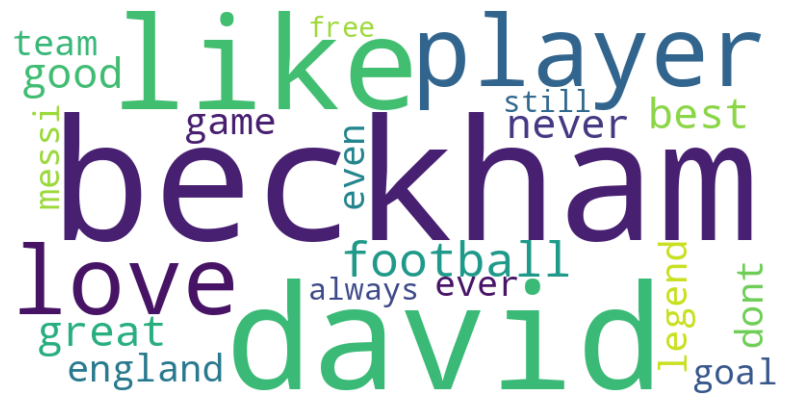

In [22]:
# Visualizing the sentiment heavy words and entities
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Dictionary with sentiment heavy words and entities and their frequencies as values
words_freq = {
    "beckham": 364,
    "david": 268,
    "like": 208,
    "player": 152,
    "love": 147,
    "football": 113,
    "great": 90,
    "good": 88,
    "best": 87,
    "never": 85,
    "game": 72,
    "england": 70,
    "legend": 70,
    "dont": 70,
    "even": 66,
    "goal": 63,
    "team": 62,
    "messi": 61,
    "ever": 60,
    "always": 59,
    "still": 56,
    "free": 50
}

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_freq)

# Plotting the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hiding axes
plt.show()


# Bar Chart of Sentiment Heavy Words and Entities with their frequencies

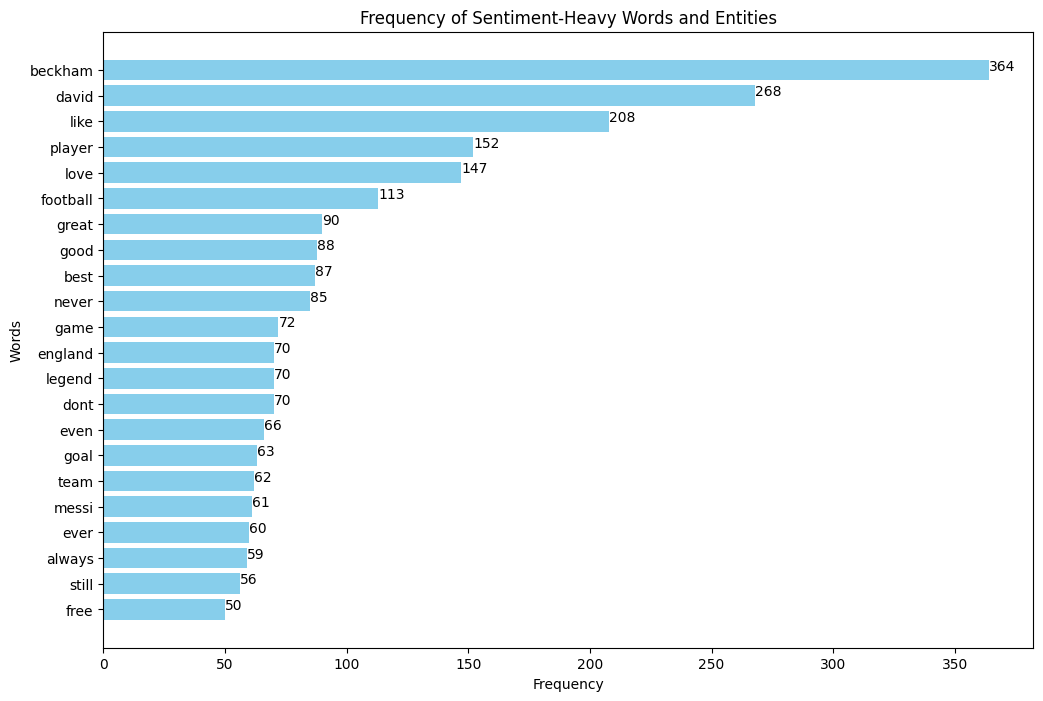

In [23]:
# Visualizing the sentiment heavy words and entities and their frequencies as values

# List of words and their frequencies
words = [
    "beckham", "david", "like", "player", "love", "football", "great", "good",
    "best", "never", "game", "england", "legend", "dont",
    "even", "goal", "team", "messi", "ever", "always", "still", "free"
]

frequencies = [
    364, 268, 208, 152, 147, 113, 90, 88,
    87, 85, 72, 70, 70, 70,
    66, 63, 62, 61, 60, 59, 56, 50
]

# Plotting the bar chart
plt.figure(figsize=(12,8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Frequency of Sentiment-Heavy Words and Entities')
plt.gca().invert_yaxis()  # Inverting y axis to have the most frequent word on top

# Adding frequencies next to the bars  # Adding frequencies next to the bar
for index, value in enumerate(frequencies):
    plt.text(value, index, str(value))
plt.show()

# Tfidf Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function for Pre-processing text by removing numbers
def preprocess_text(text):
    return re.sub(r'\d+', '', text)

# loading data from json file
with open('DB_youtube.json', 'r', encoding='utf-8') as f:
    posts_data = json.load(f)

    comments = []
    for post in posts_data:
        for comment in post['Comments']:
            preprocessed_comment = preprocess_text(comment)  # Preprocessing the comments
            comments.append(preprocessed_comment)  # Storing preprocessed comments

# Converting the comments into a dataframe
df = pd.DataFrame(comments, columns=['Cleaned_Comments'])

# Checking the dataframe
print("DataFrame preview (first 5 rows):")
print(df.head())

# Adjusting the token pattern to exclude purely numerical tokens and refining the ngram range
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    token_pattern=r'\b[a-zA-Z]{3,}\b',  # Excludes purely numeric tokens and requires at least three characters
    ngram_range=(1,2),  #unigram and bi-gram
    min_df=10,  # Increase min_df to reduce features that appear rarely
    max_df=0.5 # Lower max_df to exclude terms that are too common

)

# Fitting and transforming the comments into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Comments']).toarray()

# Converting to DataFrame for better readability
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

DataFrame preview (first 5 rows):
                     Cleaned_Comments
0       Favourite David Beckham goal?
1  Goals before I was born..Beckham❤❤
2      Clearly not just a pretty face
3    greatest of his generation.... ❤
4   Bald beckham at United was scary.
   absolute  absolutely  act  actually  age  amazing  amp  awesome  bad  ball  \
0       0.0         0.0  0.0       0.0  0.0      0.0  0.0      0.0  0.0   0.0   
1       0.0         0.0  0.0       0.0  0.0      0.0  0.0      0.0  0.0   0.0   
2       0.0         0.0  0.0       0.0  0.0      0.0  0.0      0.0  0.0   0.0   
3       0.0         0.0  0.0       0.0  0.0      0.0  0.0      0.0  0.0   0.0   
4       0.0         0.0  0.0       0.0  0.0      0.0  0.0      0.0  0.0   0.0   

   ...  www  www youtube  yeah  year  years  yes  young  youtube  youtube com  \
0  ...  0.0          0.0   0.0   0.0    0.0  0.0    0.0      0.0          0.0   
1  ...  0.0          0.0   0.0   0.0    0.0  0.0    0.0      0.0          0.0   
2  ...  

# Vader Sentiment Analysis

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initializing VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Sentiment analysis with error handling
def analyze_sentiment(text):
    if text:  # Checking if text is not empty or None
        try:
            sentiment = analyzer.polarity_scores(text)
            return sentiment['compound']  # Compund score represents overall sentiment
        except Exception as e:
            print(f"Error analyzing sentiment: {e}")
            return None  # Return None if there's an error
    else:
        return None  # Return None for empty or None text

# Applying sentiment analysis
df['sentiment_score'] = df['Cleaned_Comments'].apply(analyze_sentiment)

# Categorize sentiment based on the score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Printing results
print("DataFrame with sentiment scores and categories (first 5 rows):")
print(df[['Cleaned_Comments', 'sentiment_score', 'sentiment_category']].head())

DataFrame with sentiment scores and categories (first 5 rows):
                     Cleaned_Comments  sentiment_score sentiment_category
0       Favourite David Beckham goal?           0.0000            neutral
1  Goals before I was born..Beckham❤❤           0.8555           positive
2      Clearly not just a pretty face           0.0186            neutral
3    greatest of his generation.... ❤           0.8555           positive
4   Bald beckham at United was scary.          -0.1027           negative


#  Visualizing sentiment score distribution by histogram and density plot

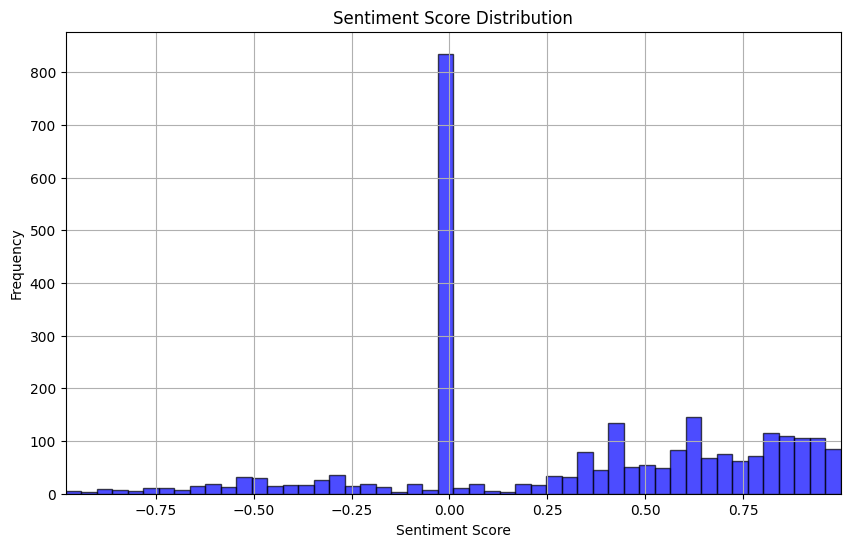

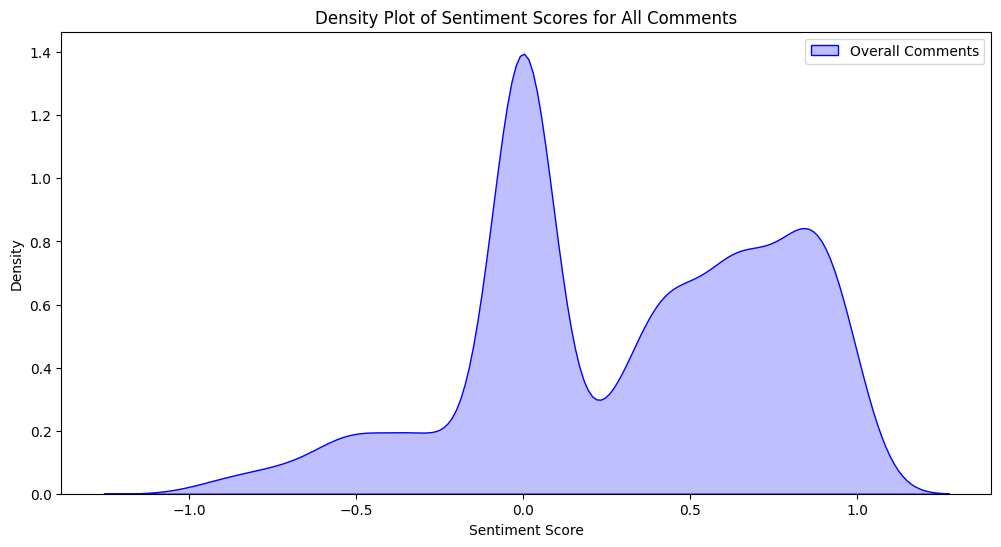

In [26]:
#Visualizing sentiment score distribution by histogram and density plot

num_bins = 50  # Number of bins

# Plotting sentiment score distribution
plt.figure(figsize=(10,6))
plt.hist(df['sentiment_score'], bins=num_bins, alpha=0.7, color='blue', edgecolor='black')
plt.grid(True)   # For better readability

# Setting plot titles and labels
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')

# Setting x and y limits
plt.xlim(df['sentiment_score'].min(), df['sentiment_score'].max())
plt.ylim(0, plt.ylim()[1])  # Ensuring y axis starts from 0 and is correclty scaled

plt.show()


# Plotting density of sentiment scores for all comments
import seaborn as sns
plt.figure(figsize=(12,6))
sns.kdeplot(df['sentiment_score'], fill=True, color='blue', label='Overall Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores for All Comments')
plt.legend()
plt.show()

# Word Cloud for overall comments

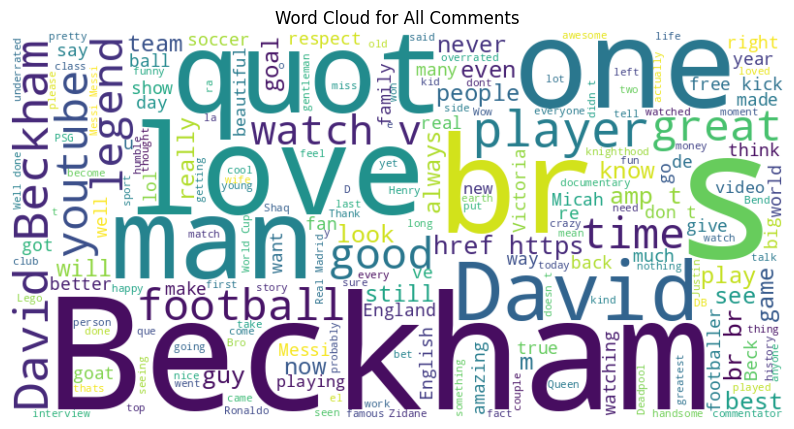

In [27]:
# Word Cloud for overall comments

from wordcloud import WordCloud, STOPWORDS
all_comments = ' '.join(df['Cleaned_Comments'])

# Generating word cloud with custom settings
wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=set(STOPWORDS), max_words=200, colormap='viridis'
).generate(all_comments)

# Displaying the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Word Cloud for All Comments')
plt.show()


### LDA Model

### Plotting coherence term plot to determine optimal number of topics

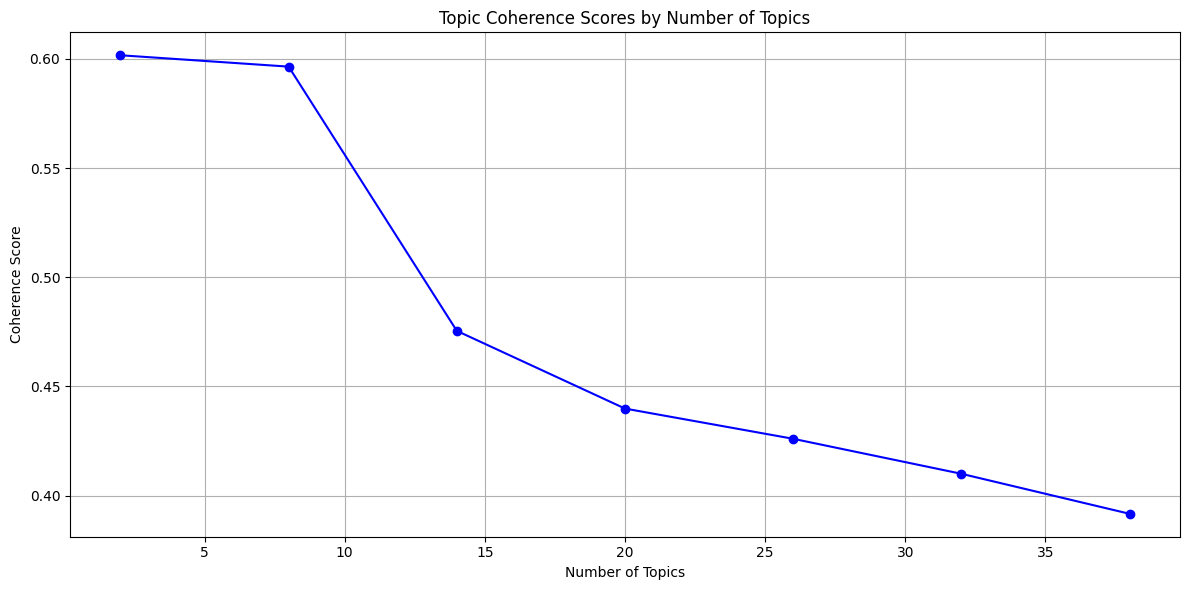

Optimal number of topics: 2


In [28]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import numpy as np

# Extracting 'Cleaned_Comments' from the DataFrame
lPosts = df['Cleaned_Comments'].tolist()
# print(lPosts)
data = [post.split() for post in lPosts]

# Create Dictionary and Corpus (this part remains the same)
id2word = corpora.Dictionary(data)
texts = data
corpus = [id2word.doc2bow(text) for text in texts]

def compute_coherence_for_model(params):
    """Compute coherence for a single model"""
    num_topics, dictionary, corpus, texts = params
    model = gensim.models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """Compute coherence values for multiple models in parallel"""
    pool = Pool(processes=cpu_count())
    coherence_values = pool.map(
        compute_coherence_for_model,
        [(num_topics, dictionary, corpus, texts) for num_topics in range(start, limit, step)]
    )
    pool.close()
    pool.join()
    return coherence_values

# Set parameters
start, limit, step = 2, 40, 6

# Compute coherence values
coherence_values = compute_coherence_values(id2word, corpus, texts, start, limit, step)

# Plot results
x = range(start, limit, step)
plt.figure(figsize=(12, 6))
plt.plot(x, coherence_values, 'bo-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Topic Coherence Scores by Number of Topics")
plt.grid(True)
plt.tight_layout()
plt.show()

# Find optimal number of topics
optimal_num_topics = x[np.argmax(coherence_values)]
print(f'Optimal number of topics: {optimal_num_topics}')


In [29]:
topicNum = 20
wordNumToDisplay = 10
featureNum = 1500

## Performs counting via CountVectorizer and then apply the LDA model.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lPosts)
tfFeatureNames = tfVectorizer.get_feature_names_out()

ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

### Visualising topics

In [31]:
# Define the display_topics function
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        for i in topic.argsort()[:-num_top_words - 1:-1]:
            print(f"{feature_names[i]} ({topic[i]:.4f})")
        print()

## Diplays discovered topics.

In [32]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
football (58.0127)
lol (35.4453)
micah (32.1192)
play (20.4472)
men (20.0851)
dad (13.9249)
fantastic (13.8792)
women (12.0864)
hilarious (10.5604)
cause (9.4521)

Topic 1:
br (322.2823)
man (165.9202)
good (102.9824)
people (79.1814)
beckham (77.0057)
real (74.5720)
world (73.9728)
david (64.3533)
just (63.3525)
like (56.5148)

Topic 2:
la (36.5159)
que (29.3038)
el (28.2319)
en (19.8235)
plus (15.9573)
se (14.3390)
galaxy (11.9216)
para (11.0985)
usa (9.0108)
como (8.6031)

Topic 3:
quot (124.4591)
legend (88.7001)
messi (83.3658)
beckham (63.7865)
player (60.1969)
video (27.4395)
say (27.1356)
david (25.7168)
english (24.7609)
work (22.3368)

Topic 4:
way (44.1082)
wife (27.2896)
years (25.3051)
justin (24.6599)
greatest (24.1100)
spice (19.3672)
didn (15.4345)
bieber (11.9747)
days (11.5114)
age (11.0197)

Topic 5:
great (98.5631)
ball (46.0299)
players (30.1422)
fact (16.9419)
right (16.3486)
wasn (15.8026)
seen (15.6691)
history (15.4649)
imagine (14.3313)
end (12.8572)


In [33]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne') # Use lda_model for prepare
pyLDAvis.display(panel)

# Network Analysis and Community Detection

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Documents related to Topic 0:

Document 1: Saya suka, cara dia mengancang-ancang sebelum bola di tendang

Document 2: Yep they do. Weekend specials, actually. Extra spins if you play on Saturdays.

Document 3: I like Micah but this is so over the top. These are grown men. Also it’s a football show why is Jamie and Micah screaming and shouting over a United legend lol?

Document 4: This is fantastic!😅😅😅

Document 5: Hahaha 😂😅... I would collapse lol

Document 6: Micah Richards is irrigating asf. He puts off football fans with his loud and crazy shouts everytime.

Document 7: Micah and Jamie are hilarious 🤣🤣

Document 8: They do it for the marketing....but also for their kids lol

Document 9: So sad. He wouldve stayed with MU forever. It was his home.

Document 10: In Europe they play fùtball with their feet. And in America they play football with their hands(and feet). And in America they play soccer with their feet. Men&#;s and Women&#;s.

Document 11: In Europe they call it fùtball in

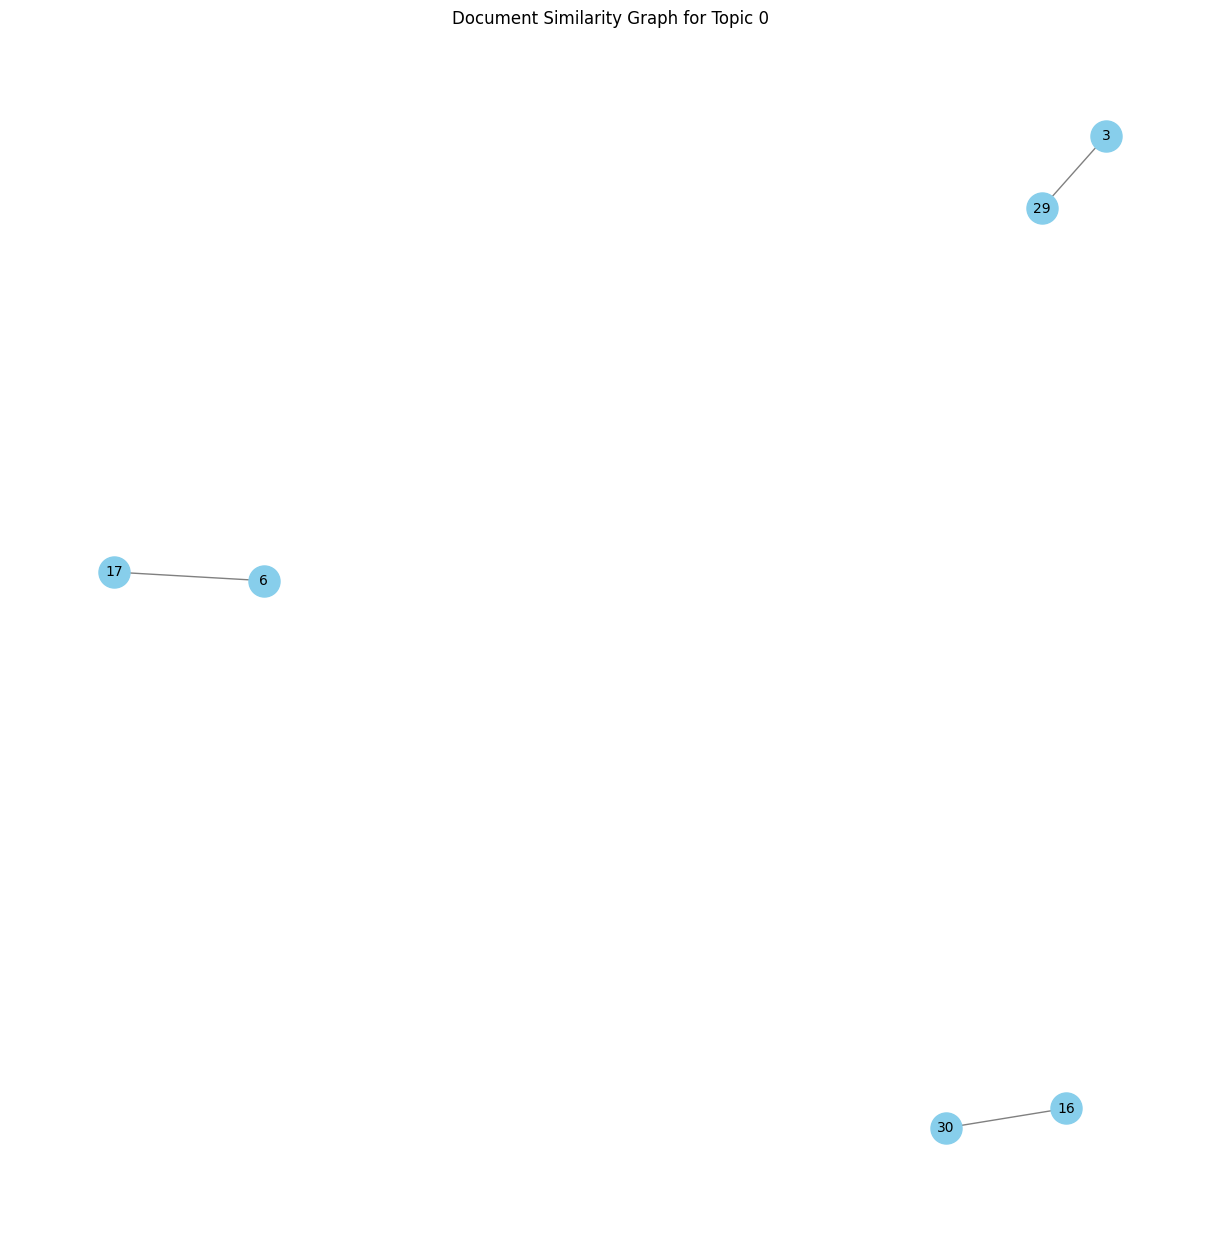

Documents related to Topic 1:

Document 1: Should&#;ve included his free kick in  world cup&#;s quarter finals

Document 2: Good to know I&#;m going to try out the late-night slots. There&#;s a night owl bonus for playing after midnight

Document 3: Totally And if you&#;re into crash games, they have daily bonuses. I won some free plays yesterday

Document 4: As mentioned &quot;A goal you will see over and over again&quot; <br><br>Still seeing it after all these years 🙇‍♂️

Document 5: I feel sorry for kids who are simply too young to have seen David Beckham play at Manchester United. <br>You thought Messi, Cristiano Ronaldo and Mbappe are superstars? NO. <br>They are not even % of how big a superstar David Beckham was at Manchester United.

Document 6: It blows my mind how many people (mostly the youths, probably because they were too young or not even born yet) who have forgotten/don&#;t know truly how amazing this man was. He wasn&#;t just a good looking guy. England has produced so

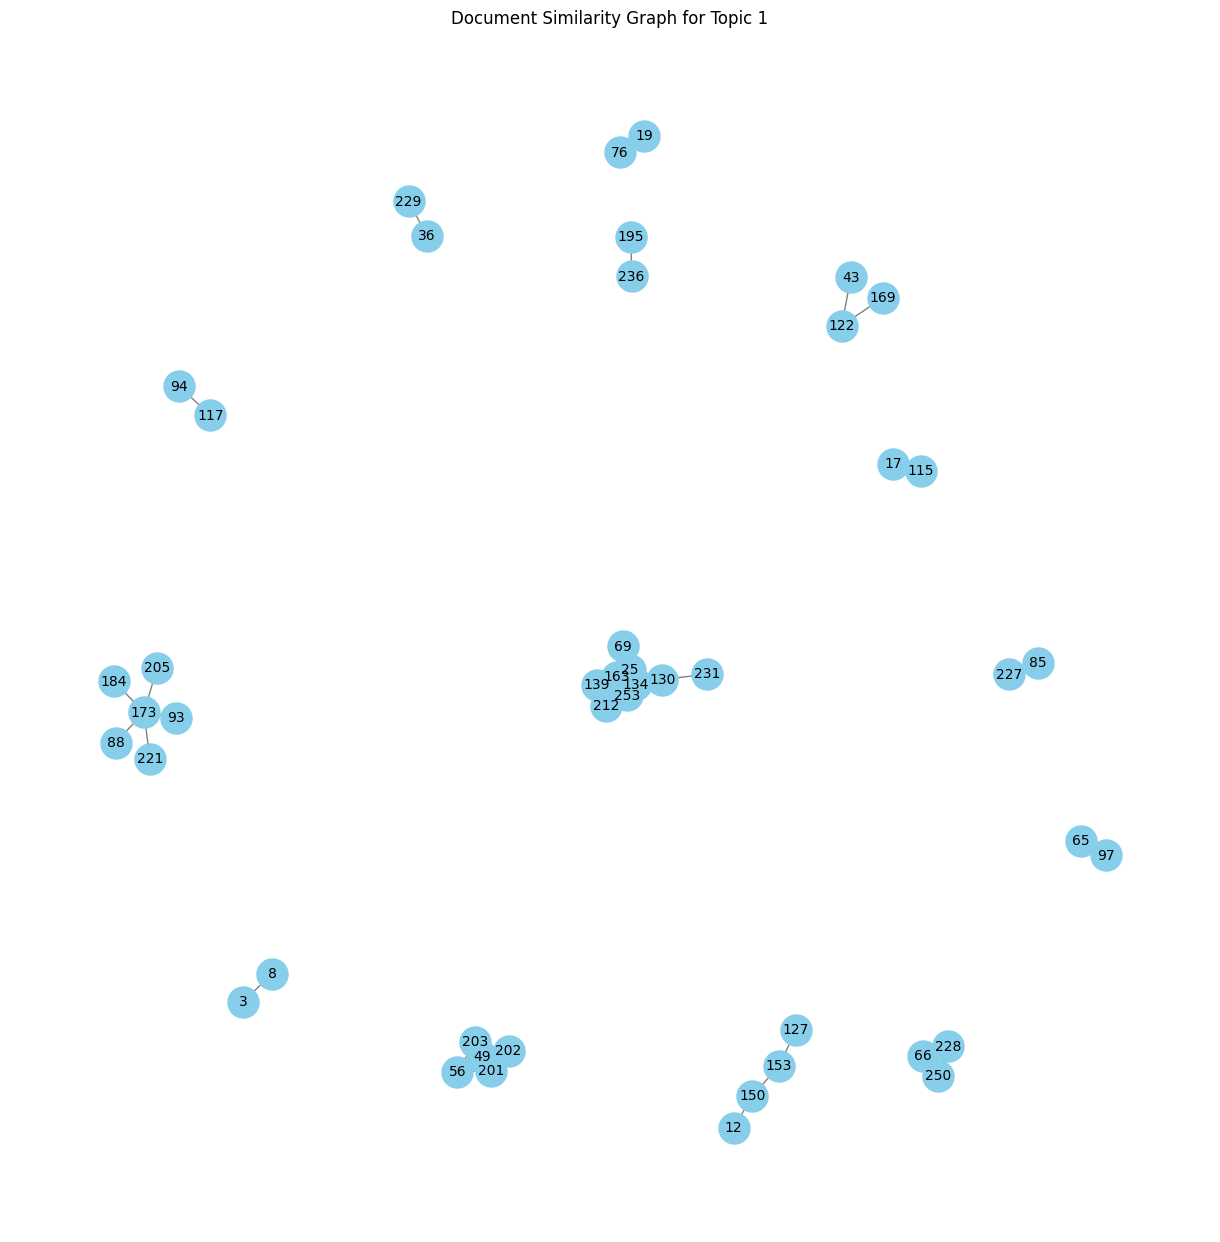

Documents related to Topic 2:

Document 1: the one was uploaded twice here

Document 2: La primera persona que veo limpiar la mesa todo el rato😂

Document 3: Mermelada de su huerto londinense

Document 4: Un Caballero. USA le agradecerá en el futuro el impulso que le dió al fútbol en el país con su equipo y con la contratación de Messi.

Document 5: David Beckham quero minhas coisas casa tudo lingerie meia fina salto alto tudo ficar sempre cheirosa e linda e fazer almoço jantar temperos frescos gostosos passear no final de semana viajar mas estou adoecida gorda com barriga mal star mas mesmo assim eu quero nada que uma nutricionista especialistas ajude no meu caso ginástica zumba musculação natação demais eu quero vida viver demais

Document 6: Lo vi el año pasado en la vigilia de la reina Isabel, haciendo cola con gente normal, sin buscar el trato de celebridad. Eso dice mucho, ¡hay que respetar a ese hombre!

Document 7: Aquì vuelvo a decirlo, ha sido muy raro que Beckham no haya est

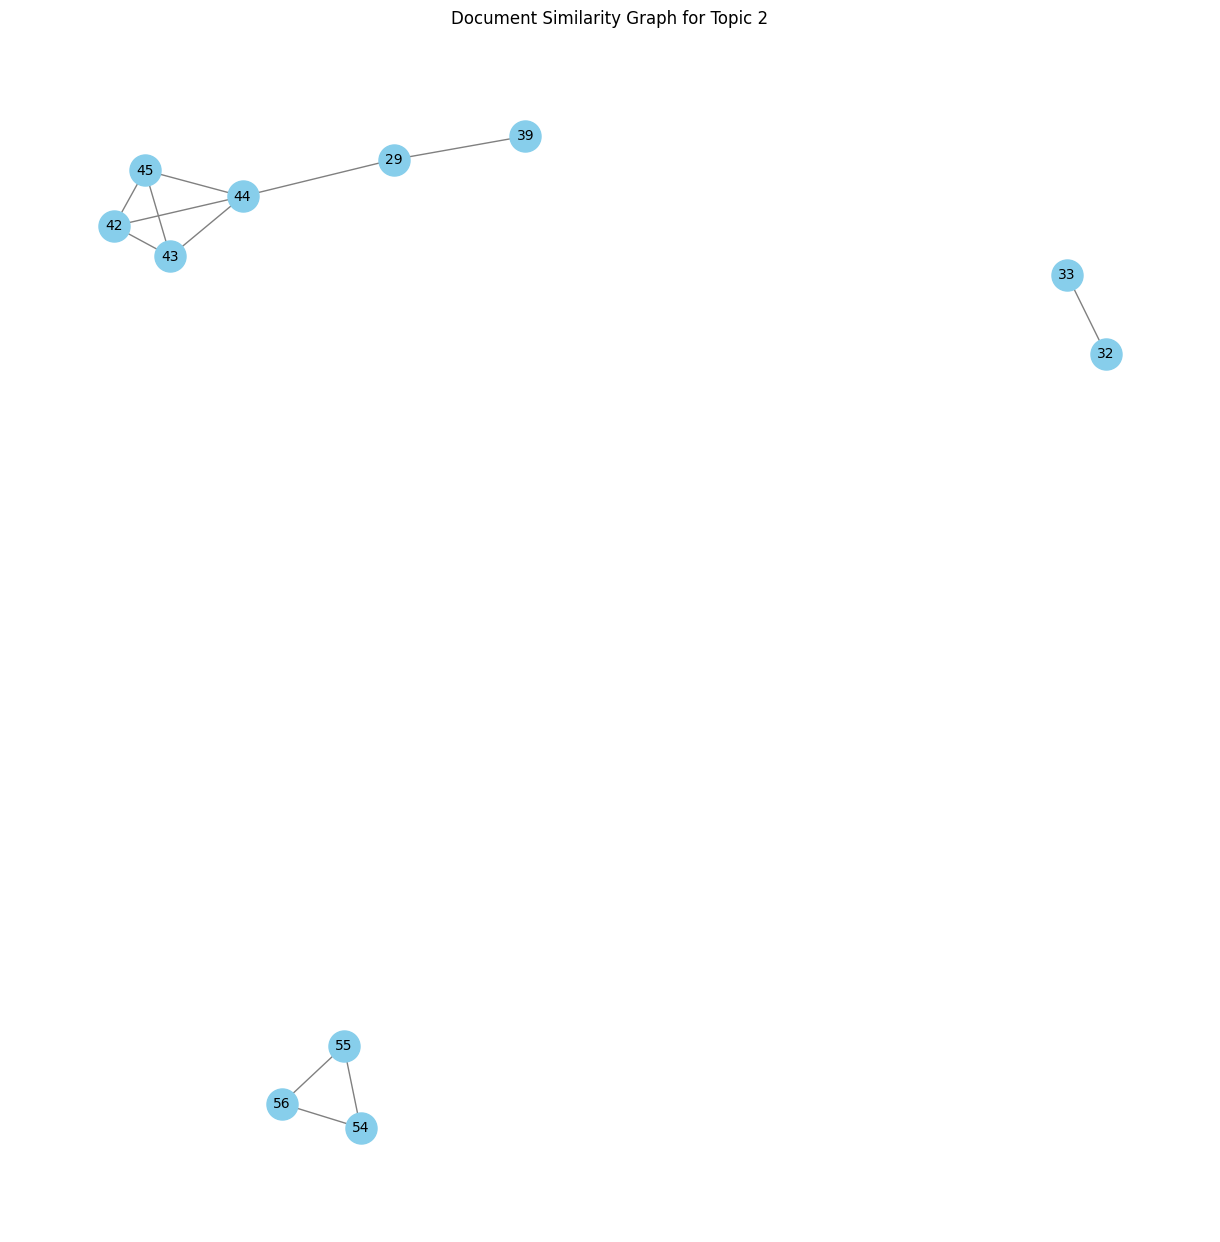

Documents related to Topic 3:

Document 1: Becks is the reason i love footbal and be a united fans❤

Document 2: beckham so underrated due to him being a celebrity. exquisite technique

Document 3: &quot;That was brilliant!, That was breathtaking!, THAT WAS BECKHAM!!

Document 4: He is the goat of freekick takers

Document 5: Thala for Reason 😂

Document 6: Incredible shoot no given time to keeper

Document 7: All I know is Beckham,  Ronaldo, Ronaldinho,  Messi, Pele, Zidane, Rooney, neymar were the best of all time.

Document 8: Legend

Document 9: English say Beckham &quot;top tier legend&quot; but the rest of the world regard him to be a pretty average player.

Document 10: Great at free kicks, but the quality and quantity of his open play goals is nothing compared to Steve Gerrard.

Document 11: Legend❤❤

Document 12: If they get ronaldo to do this i would be amazed

Document 13: no mater the club u support, david is an underrated legend! fk schole personally... i remeber those pas

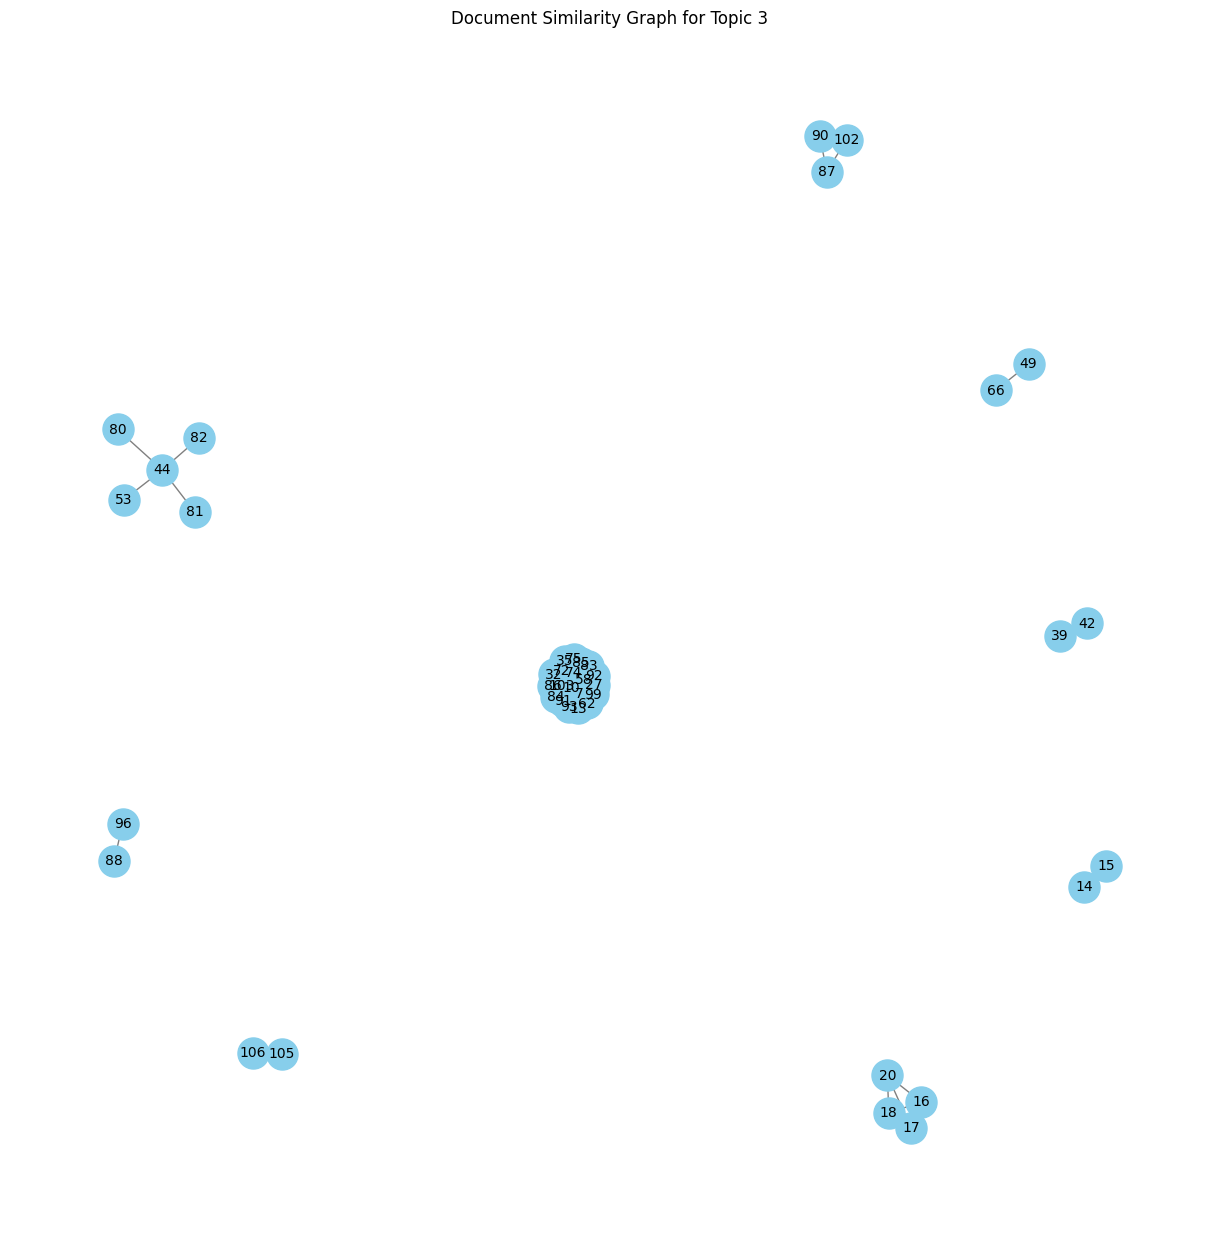

Documents related to Topic 4:

Document 1: greatest of his generation.... ❤

Document 2: underrated as fuck

Document 3: Halcyon days.

Document 4: The way he kept wiping and cleaning the table ❤ I love him

Document 5: Taylor Karen Gonzalez Jason Miller Jose

Document 6: If anyone can get the Spice Girls back together again, it&#;s him

Document 7:  years ago was the ICONIC RETURN OF THE SPICE GIRLS TOUR. ❤❤❤

Document 8: HE ALSO CHEATED ON HIS WIFE. SEND HIM TO NY FOR A TRIAL.

Document 9: For fuck sake its scripted

Document 10: آقای بکام دیوید عزیزم ازت ممنونم که قدردان بودی و برا بازی ایران اومدی می‌بوسمت

Document 11: In the days when she smiled.

Document 12: He didn&#;t get into all the spice girls.

Document 13: 꼼프라&gt;카 씨오엠 알고난뒤로 인생의 전후가 바뀌엇어요 … 사랑해요 꼼프라카

Document 14: 자신감이 바닥인 이유는 호주머니가 텅텅비어서 그래 …  꼼프v라카 들어오고 주머니 빵빵해보자

Document 15: 바람처럼 왔다가 먼지처럼 사라지는 인생인데 태풍급 바람 황사급 먼지는 되야지 꼼프라카 빨리와라

Document 16: 연금처럼 꼼프v라카 와서 쭉쭉 뽑아먹자 잘 풀릴때도 있지만 안되는날도 당연히 있다는건 인지하면서 조절 ㄱㄱ

Document 17: 보이지

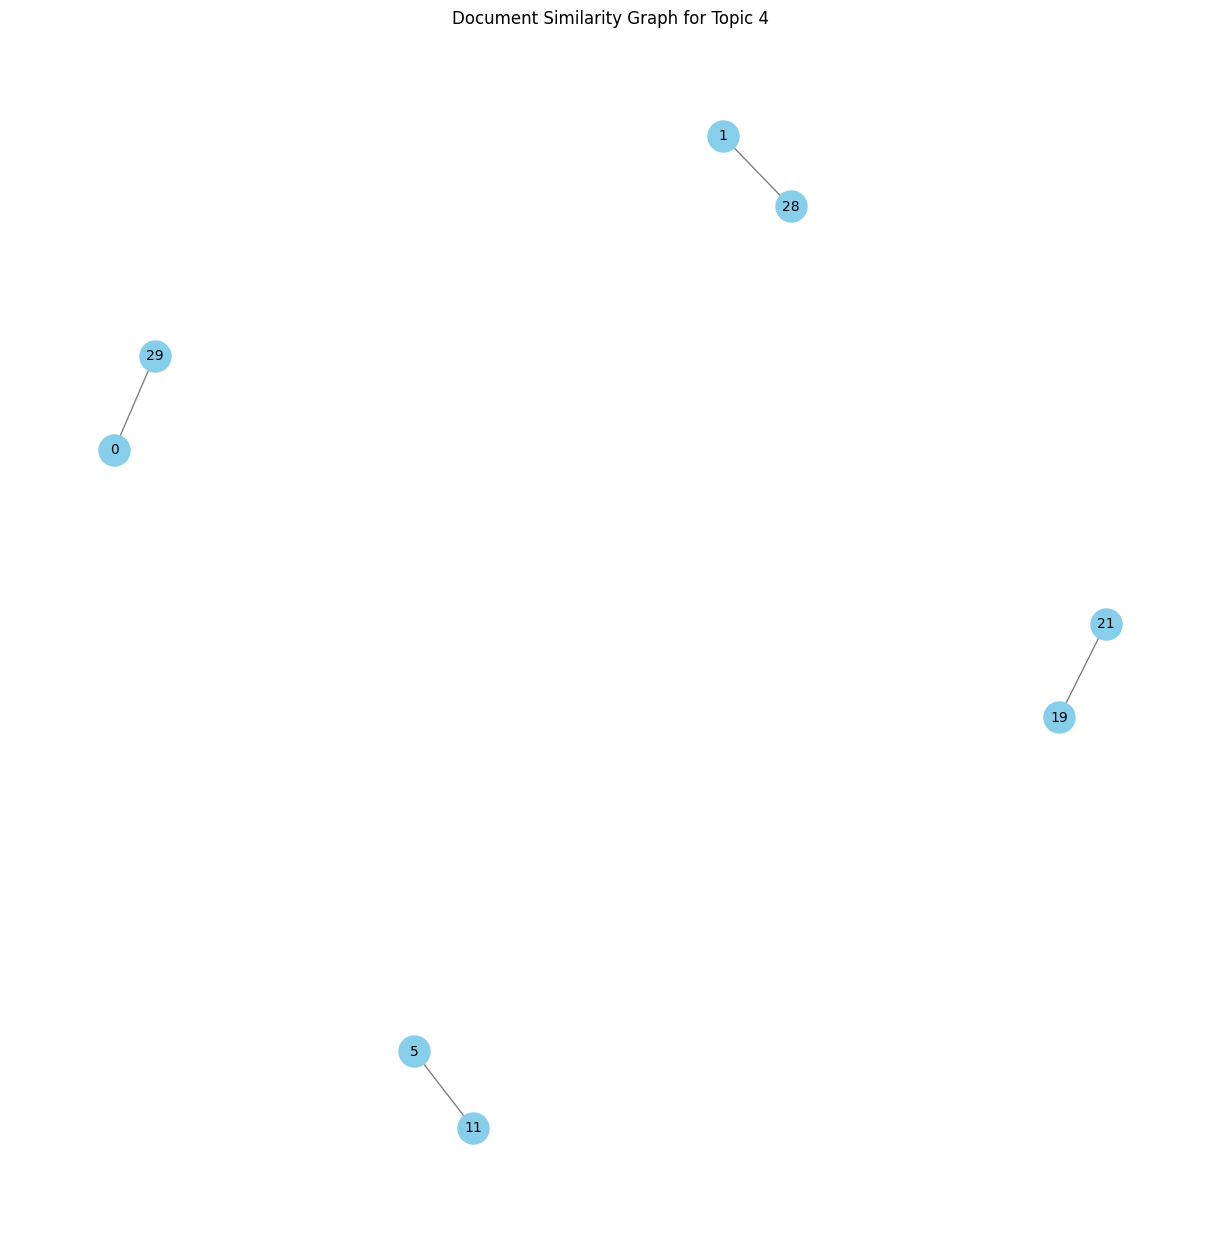

Documents related to Topic 5:

Document 1: No one has ever been able to consistently recreate how well Beckham could strike a ball. <br><br>We&#;ve seen players who are great and striking a ball and taking dead ball situations to another level but not on the same level as Beckham. <br><br>Roberto Carlos was a great strike of a ball but wasn&#;t as consistently precise as Beckham. Flawless technique.

Document 2: He literally always kicks it to the right of the goalie 😂

Document 3: See how exciting it is when players actually run withe the ball.......

Document 4: Nah.. this was Gold 😂

Document 5: M&#;aan those tattoos....nah...also dyed eyebrows do no favours at all.  In fact detract.

Document 6: He is the Roberto Carlos of England🥶

Document 7: Nothing can beat beckham and carlos free kicks

Document 8: One of the great English players in history of football 🔥❤️

Document 9: That’s actually insane. You can see a ball magically appear to the right of the screen after the second ball

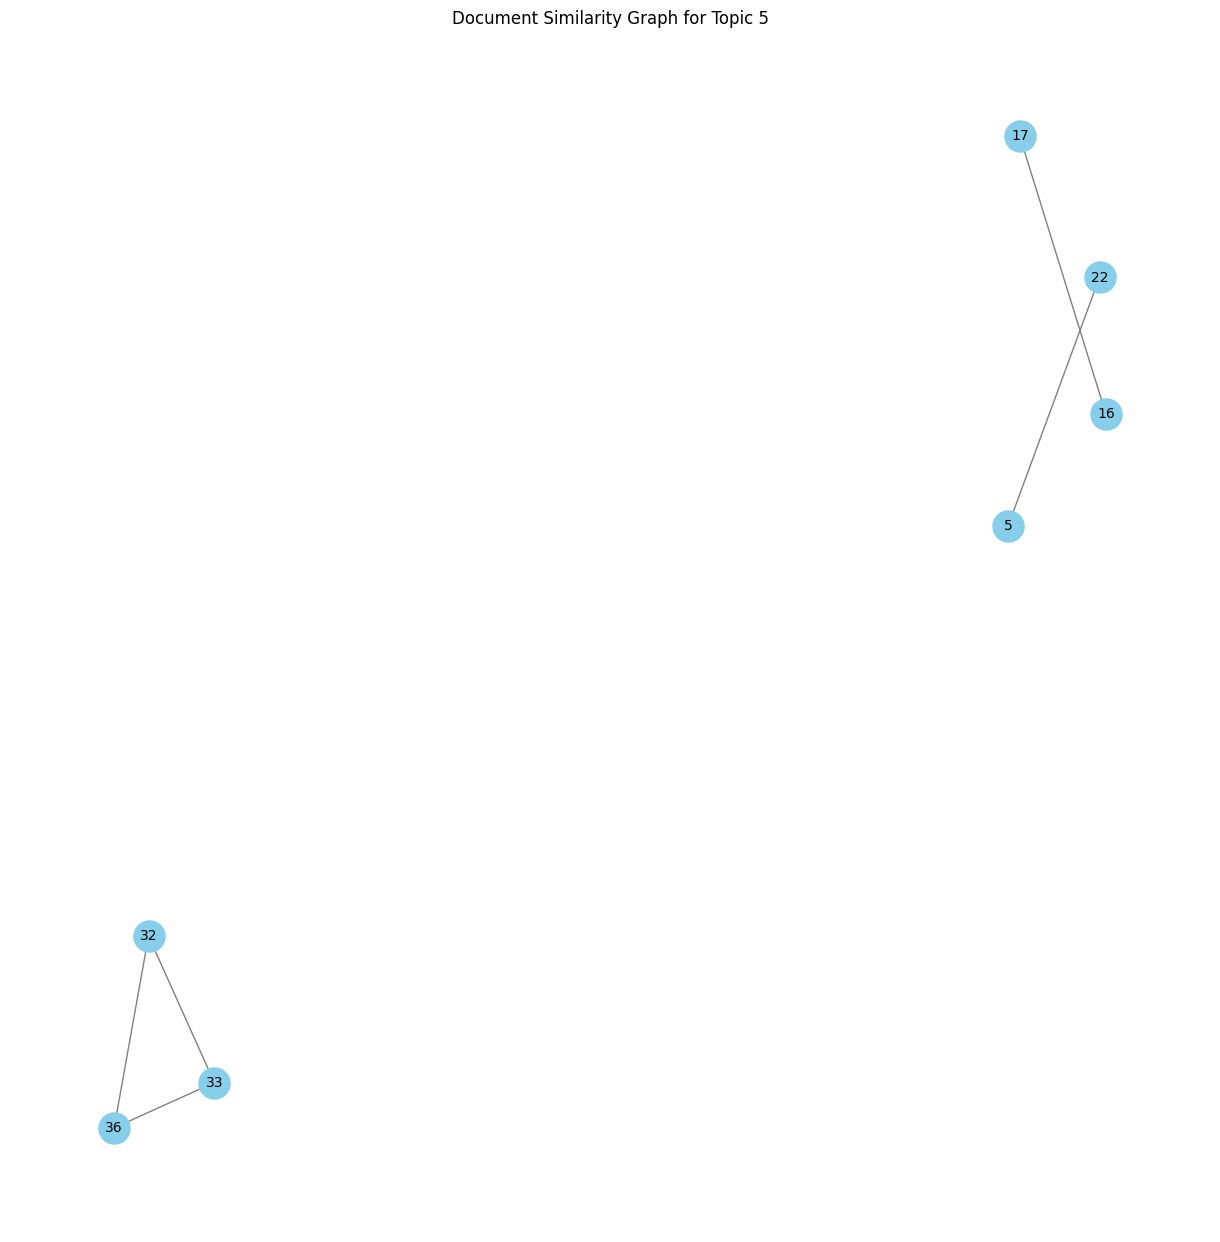

Documents related to Topic 6:

Document 1: As if David lets his mom cut his hair. : /

Document 2: You still smell lovely....Micah you fool 😂😂😂😂

Document 3: smh. story was interesting and then cut, cut, cut.

Document 4: Fella was brilliant

Document 5: هذه معجزة سدد كالغولف افضل

Document 6: بيكهام اوقف هذه السخرية

Document 7: Is that human?

Document 8: She has a great sense of humor.

Document 9: Rip fox😂

Document 10: Cinnamon and manhood 😂😂

Document 11: 😂😂 lets see !

Document 12: 뭔 🐕 소리인지… 지금은  베컴보다  못한 선수가 거의 없슴 … 니들 영국 본토애들이 우쭈쭈 키운거지… 솔까 베컴은 그냥  보통수준에서 등급낫은 핫바리정도 …. 무슨. 기록이 있냐 … 낮짜까지고 니들 영국이 잘한다고 가스라이팅 한거지 ..  찌나가는 똥개정도 보통 선수

Document 13: “Mom, book a plane to the hills”😂

Document 14: The sense of humor in with this guy😂❤❤❤

Document 15: 아디다스가 제일 잘 어울리는 선수

Document 16: She’s was always rich.

Document 17: Adidas , nike, vodafone (😂)

Document 18: no foul.....

Document 19: That was never a foul.

Document 20: What a story.

Document 21: That’s brilliant ❤

Document 22: Su

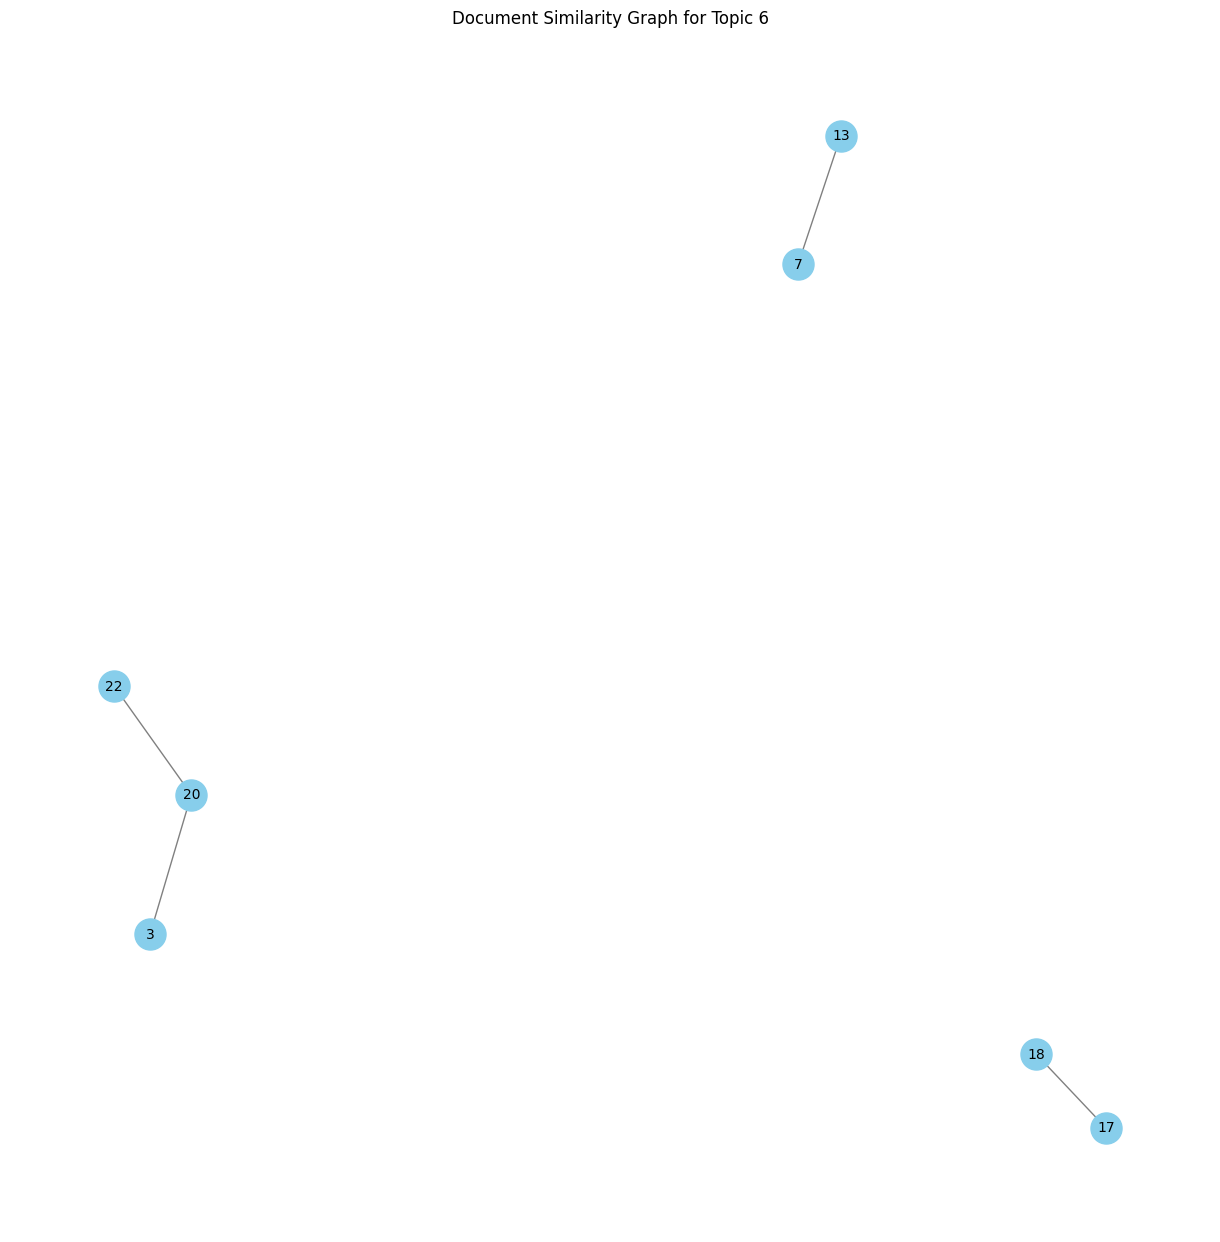

Documents related to Topic 7:

Document 1: Stick with ra for the best betting experience, their tech does not disappoint

Document 2: Becks was a good FK taker at best. A very commercial gimmick that he&#;s known for it, when several others were better and no one even knows it. <br><br>Like all things England, his ability has been overrated orders of magnitude.

Document 3: MY HERO!!😂😂😂

Document 4: best sports commentators on TV....Titi#

Document 5: I like that he handled it better than Zlatan.

Document 6: Becham  is always the best

Document 7: White Susan Williams John Clark Melissa

Document 8: Idol...

Document 9: We share the same footballing hero…. Bryan ‘Captain Marvel’ Robson 👌🏼

Document 10: Best leg walking on this planet yet.

Document 11: , % overrated

Document 12: better than harry kane

Document 13: Captain Disillusion!

Document 14: Who is here after watching Captain Disillusion debunk?

Document 15: Hello Captain D

Document 16: Captain Disillusioned a.k.a. DEBUNKED

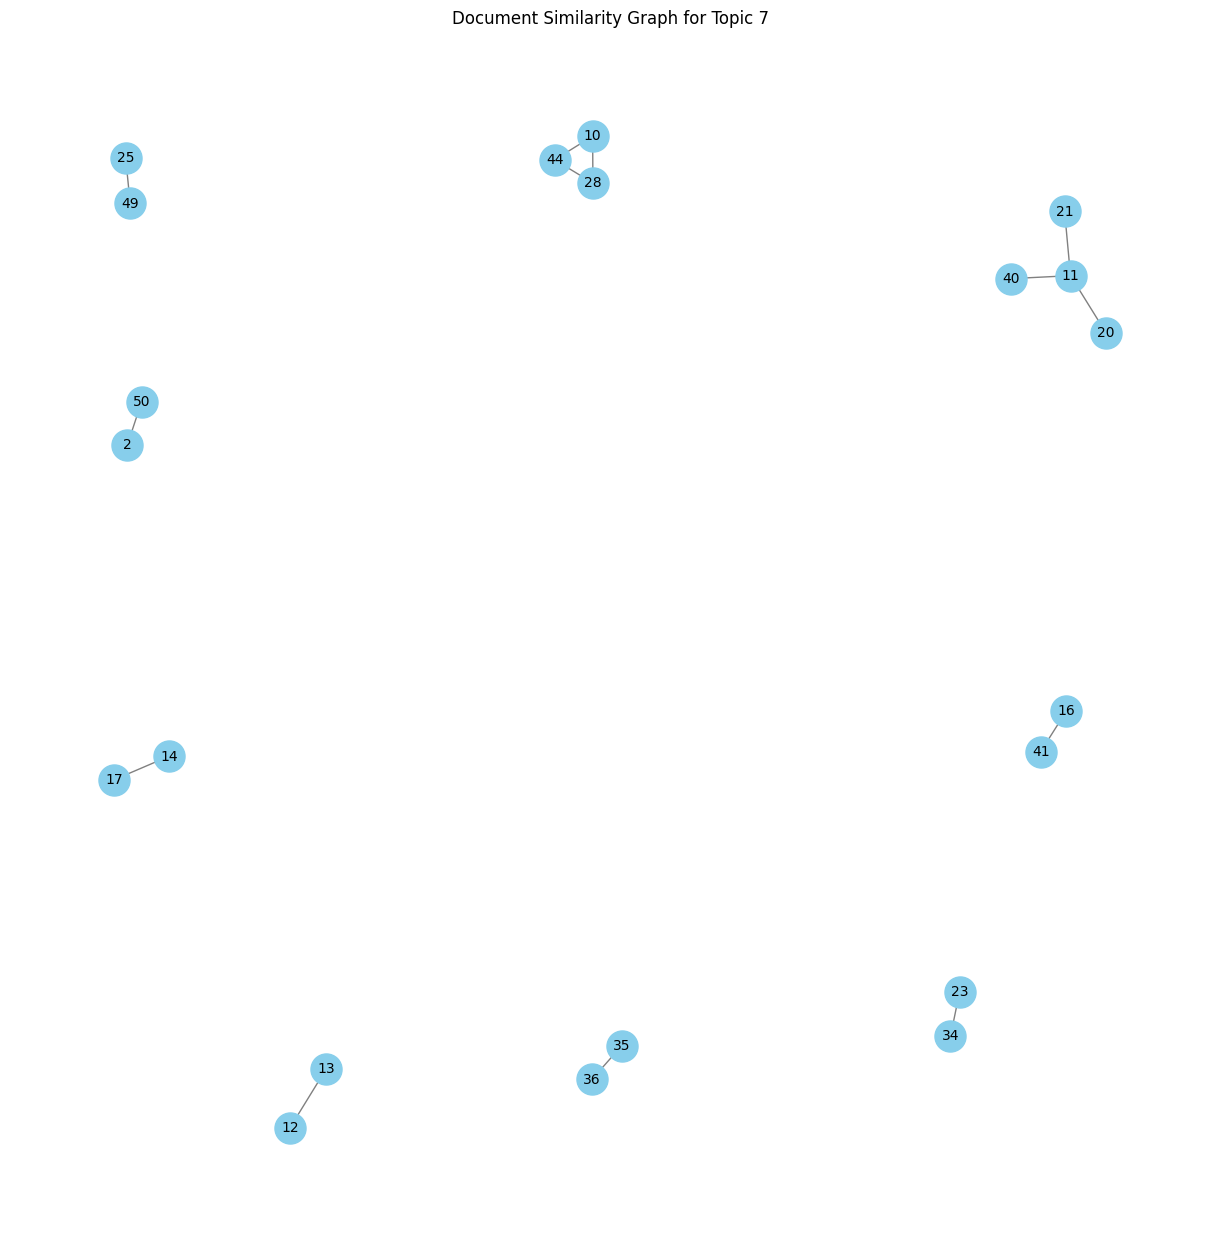

Documents related to Topic 8:

Document 1: Not yet but I saw there’s a loyalty program too. Earn points for playing and get exclusive rewards.

Document 2: Bro was edited

Document 3: All he cares about is £££$$$

Document 4: Mermi atsan bu kadar düzdün vuramazsın aq adam ağır nişancı

Document 5: Holy shit! Bad Ass

Document 6: Ich wurde &quot; getriggert &quot; <br>Und ich reagiere nicht auf triggern normalerweise <br><br>Hatte es aber weil ich nicht wusste links/ rechts <br><br>Sie hat mich gefragt ob ich die richtige entscheidung getroffen habe <br><br>Ja natürlich <br><br>Aber natürlich nicht -

Document 7: Das bedeutet die Informationen würden woanders hergenommen

Document 8: Das bedeutet Sie hat absolut nichts mit den Punkten zutun

Document 9: She has nothing to do with it.<br>Ich dachte sie wollte mir schaden.<br>Wollte sie aber nicht <br>Und warum ist sie nun wütend <br>Auf die besagte Zeit . Davor natürlich nicht. Das stalken , grenzend überschreitend reden ,anrufen.<br>Das

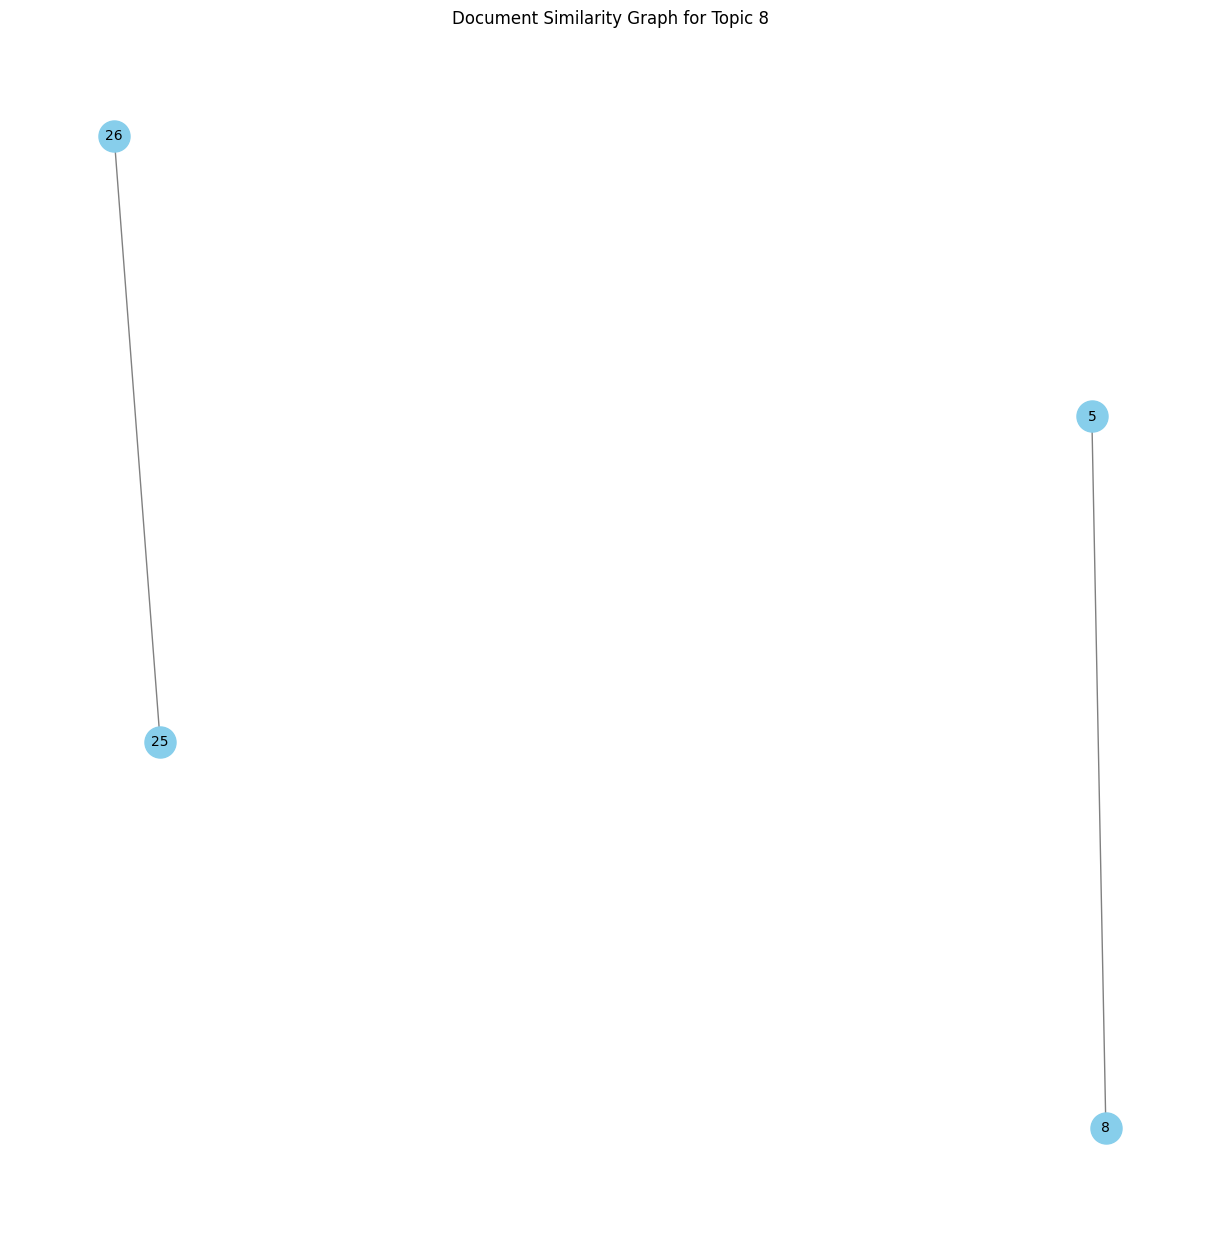

Documents related to Topic 9:

Document 1: Always a fair game with ra, they really know how to treat bettors right.

Document 2: Thiery Henry is not able to hide his jealousy towards Beck.<br>David is a gentleman 🎩

Document 3: HEY HENRY SHOW YOUR RESPECT TO BECKHAM ,, DONT TROW SHIRT IN FRONT OF HIM !!!

Document 4: Henry ruins this show

Document 5: I hope Beckham has applied for an injunction!! Keep Micah at a safe distance so he can’t be a threat!

Document 6: Becks is simply a boss! I&#;d vote for him to be king of england

Document 7: Henry smiling and snorking is the funniest😂

Document 8: Is Henry and that female presenter dating or suen

Document 9: Respect to big Meeks how he fold the jersey, you dont see many (old) city players doing that.

Document 10: Wtf Micah keeps smelling Becks for

Document 11: Ok it&#;s awkward now between them

Document 12: Love him usually but weird energy from Henry this segment. Giving off attention-jealousy vibes.

Document 13: Henry is annoying

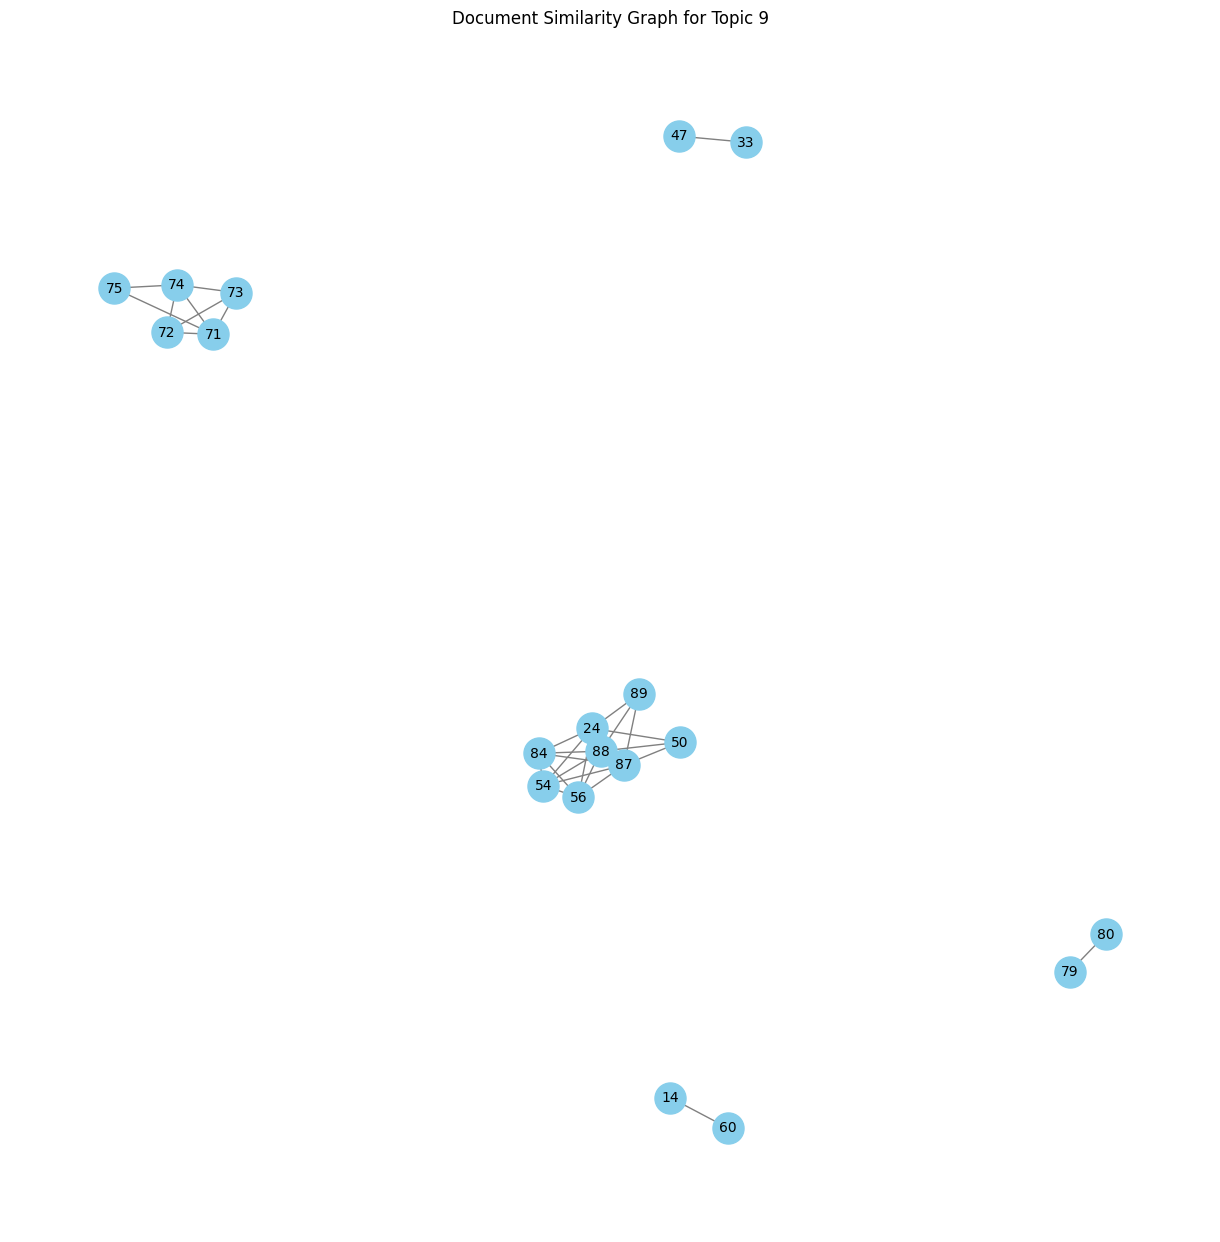

Documents related to Topic 10:

Document 1: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> That’s a truly elegant goal, that’s the best way to describe it.

Document 2: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> Haaland?

Document 3: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> Haaland

Document 4: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> Haaland in ManCity 😂 He’s older than I expected

Document 5: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> # last name 🤣🤣🤣

Document 6: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a>  Erling Haaland’s father knocking down Scholes 😬😬😬

Document 7: what is that kit at<a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a>

Document 8: Perez Thomas Walker Edward Wilson Mark

Document 9: <a href="https://www.youtube.com/watch?v=oTpTVqJXho&amp;t=">:</a> haaland’s dad 😂

Document 10: <a href="https://www.youtube.com/watch?

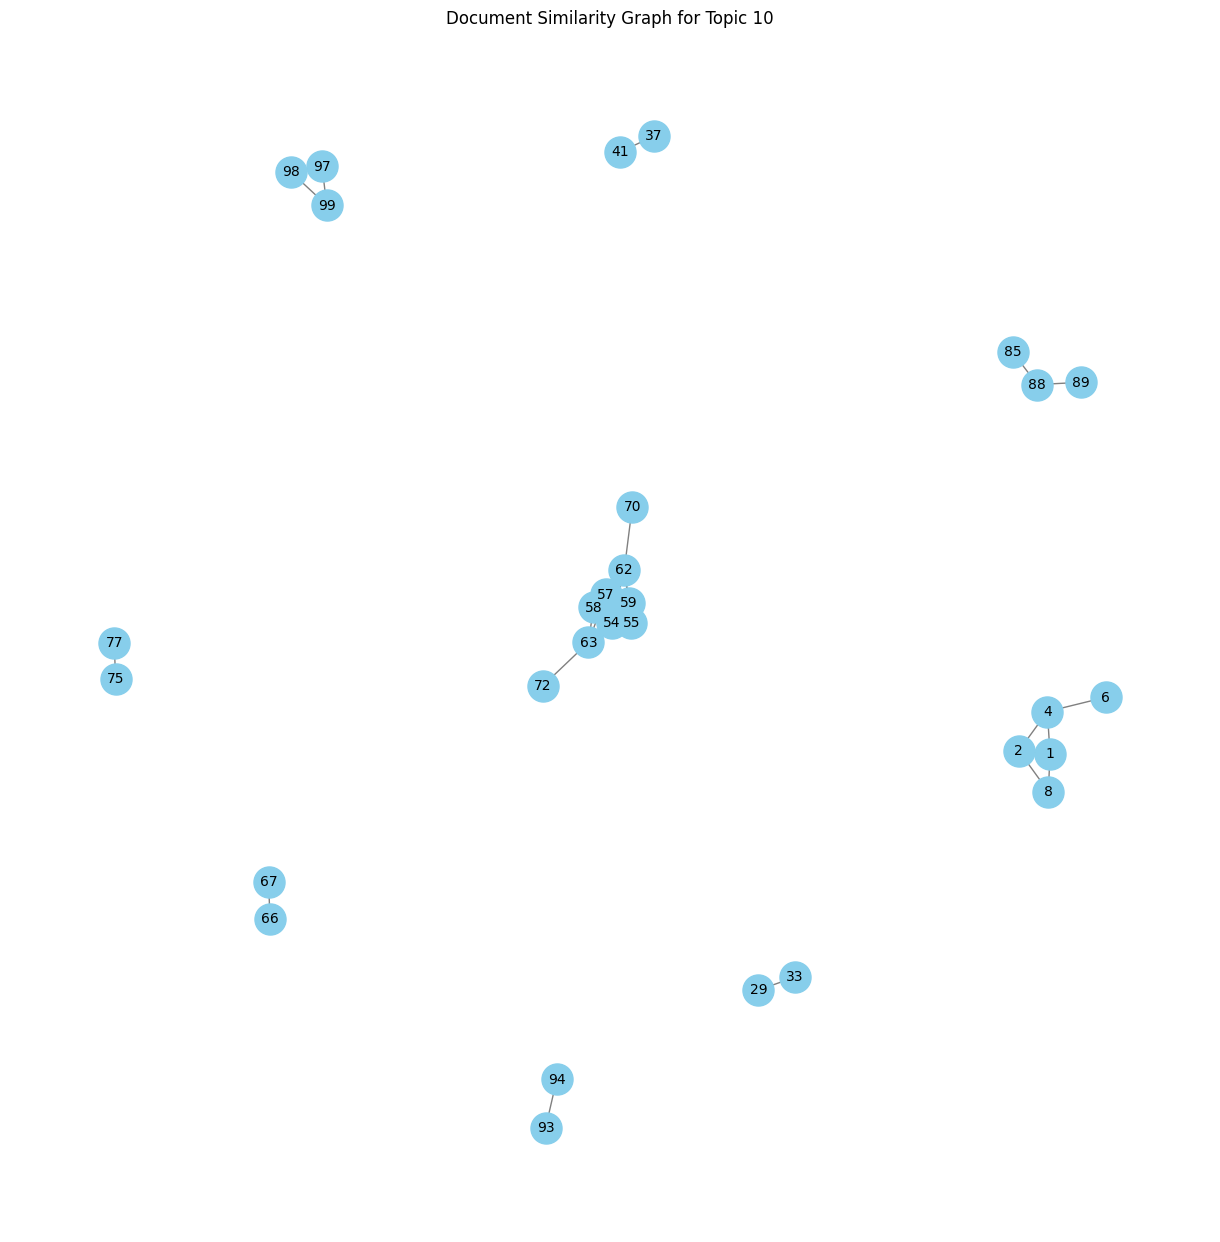

Documents related to Topic 11:

Document 1: Hey buddy have you tried the live casino on rabet yet? It&#;s almost like being in Vegas

Document 2: This is pure class 👏

Document 3: Ball english was always going to his left, goalies right. Just guard half the goal on those free kicks...

Document 4: That Scholes Beckham goal is just class

Document 5: Did he bring him crisps?

Document 6: kate with the accent switching ... daymmmmmmmm ... pure unadulterated cringe 😂

Document 7: He’s pulling the skin off, he ain’t doing it right!

Document 8: Goes in about his wife - read Tom Bower’s book about the Beckhams. This guy played up on Posh many many times, right from the beginning of their marriage.

Document 9: class

Document 10: So much respect for Beckham - class act

Document 11: Pure class 👌

Document 12: McManaman and Scholes in the mid was a great pairing.

Document 13: If only played Beckham Scholes and Hargreaves and not Lampard and Gerrard who weren&#;t even important to there team

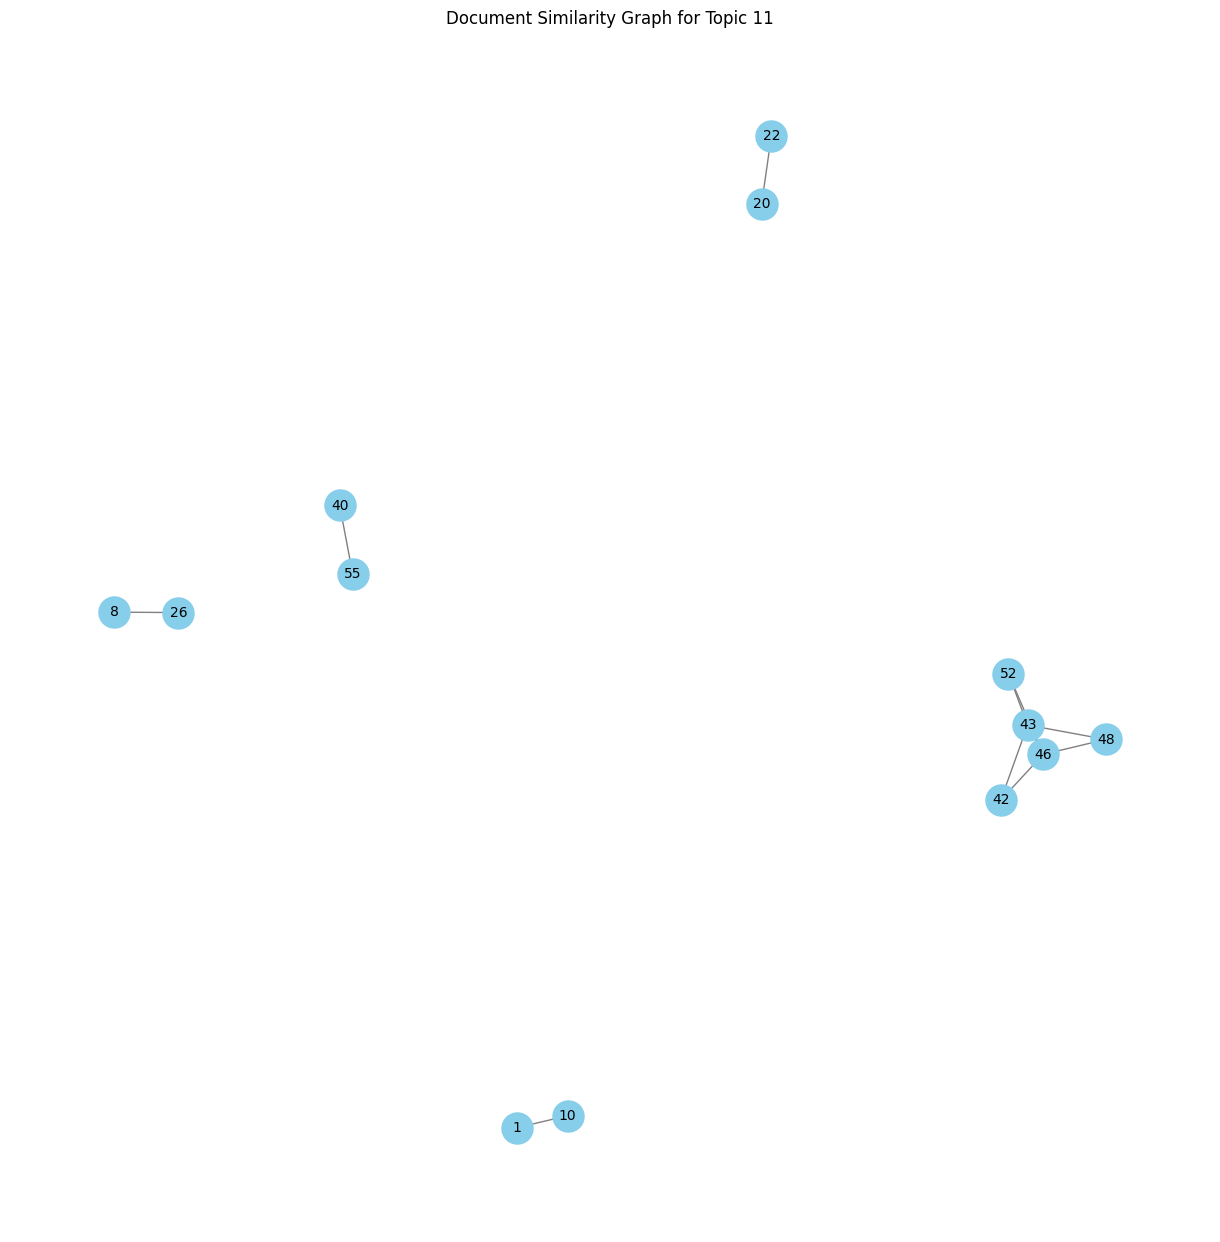

Documents related to Topic 12:

Document 1: British 🐐

Document 2: Love the weekly chances RA gives us, their odds are always spot on.

Document 3: ra&#;s platform is so easy to navigate, made my first bet in minutes

Document 4: I should check that out. Been eyeing the roulette games. There&#;s something about that spinning wheel

Document 5: How he didn&#;t get a ballon dor in  is insane same as keane, Giggs or Scholes not getting one

Document 6: Titi lookin a bit jelly for getting out-starred! :p

Document 7: He&#;s getting the Simon cowell facial experiment by the looks of him

Document 8: What a beautiful love story ❤

Document 9: He deserved a ballon dor

Document 10: He Israel don&#;t trust him

Document 11: I would love to see Roy Keane in that position. It would be a bit more entertaining!🤣

Document 12: this is kinda mean :( i feel bad for becks

Document 13: Cordon....what a knob!

Document 14: Love the  beautiful game, new found love for the Beckhams ❤✌🏾

Document 15: What

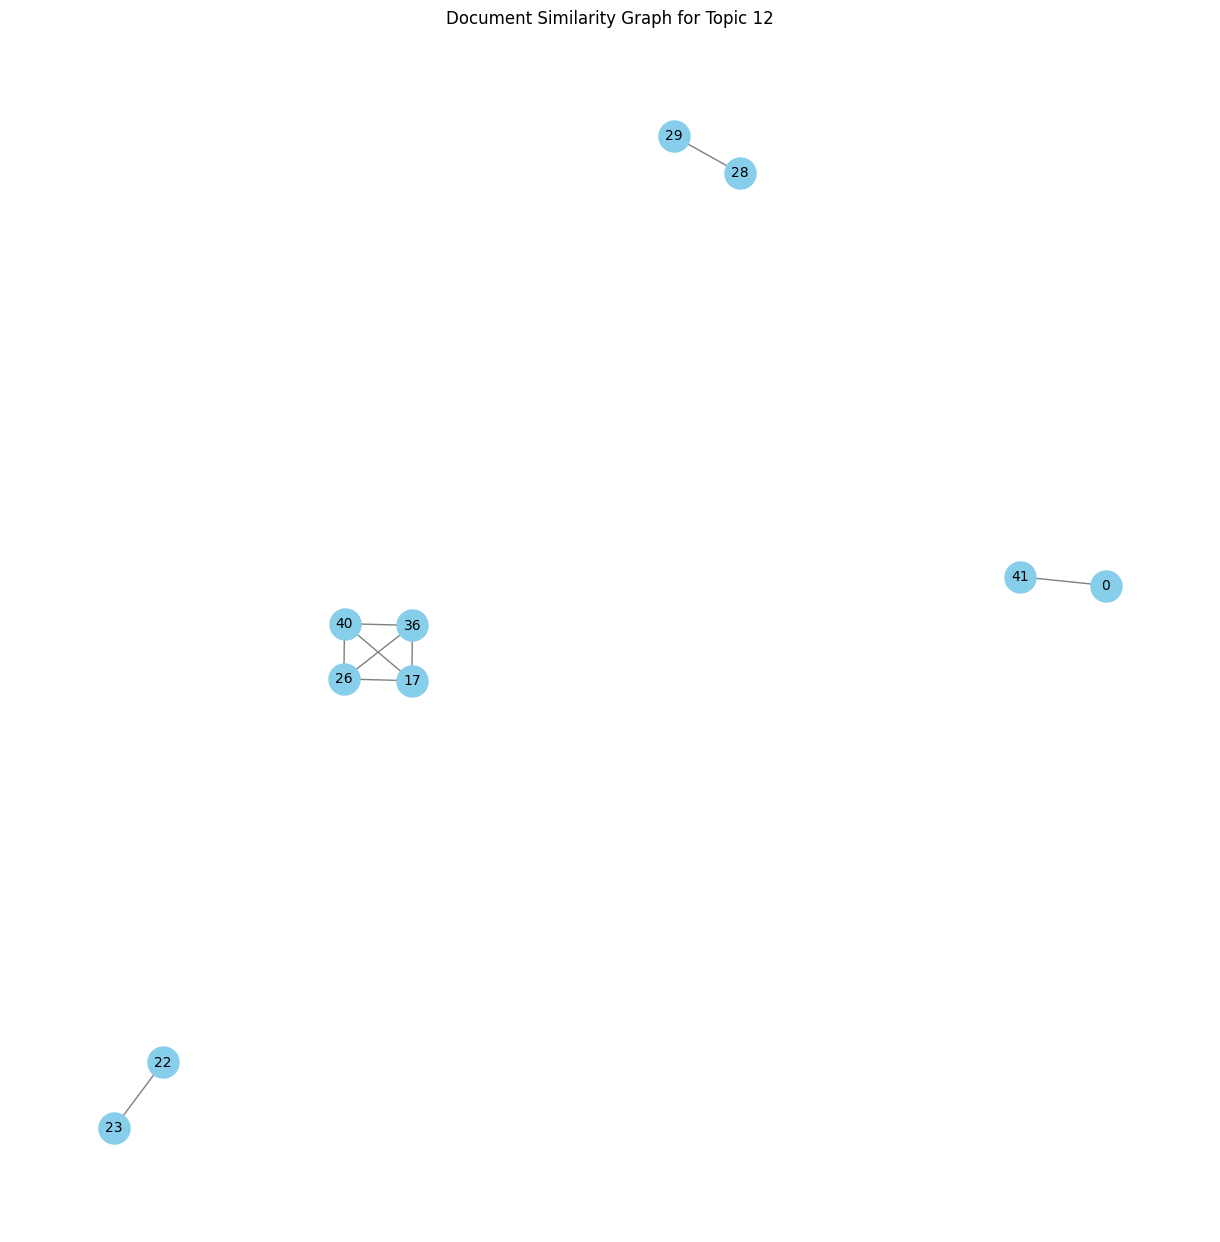

Documents related to Topic 13:

Document 1: Clearly not just a pretty face

Document 2: Bald beckham at United was scary.

Document 3: Never miss a game with RA, their site and app just never crash, so stable

Document 4: Tech at ra is just reliable, makes betting feel like a fun game not a chore

Document 5: Not yet, I&#;ve been glued to the cricket betting. There&#;s a match bonus for new games. Did you know

Document 6: For me it goes like this: Eric Cantona, David Beckham, Paul Scholes, Roy Keane, Ryan Giggs, Wayne Rooney, Rio Ferdinand, Peter Schmeichel, Ole Gunnar Solskjaer, Cristiano Ronaldo, Andy Cole, Gary Neville and others follow. Currently, Bruno Fernandes and Lisandro Martinez.

Document 7: One word .....Greece .

Document 8: i wish England had Won a WC with Beckham,,  not even a soccer fan,,,  but he was insparational,,, and got some terrible calls in WCups

Document 9: How high is the bar? There&#;s no Gary Neville, 🤣🤣🤣

Document 10: I love the way Kate said &quot;ohhhh 

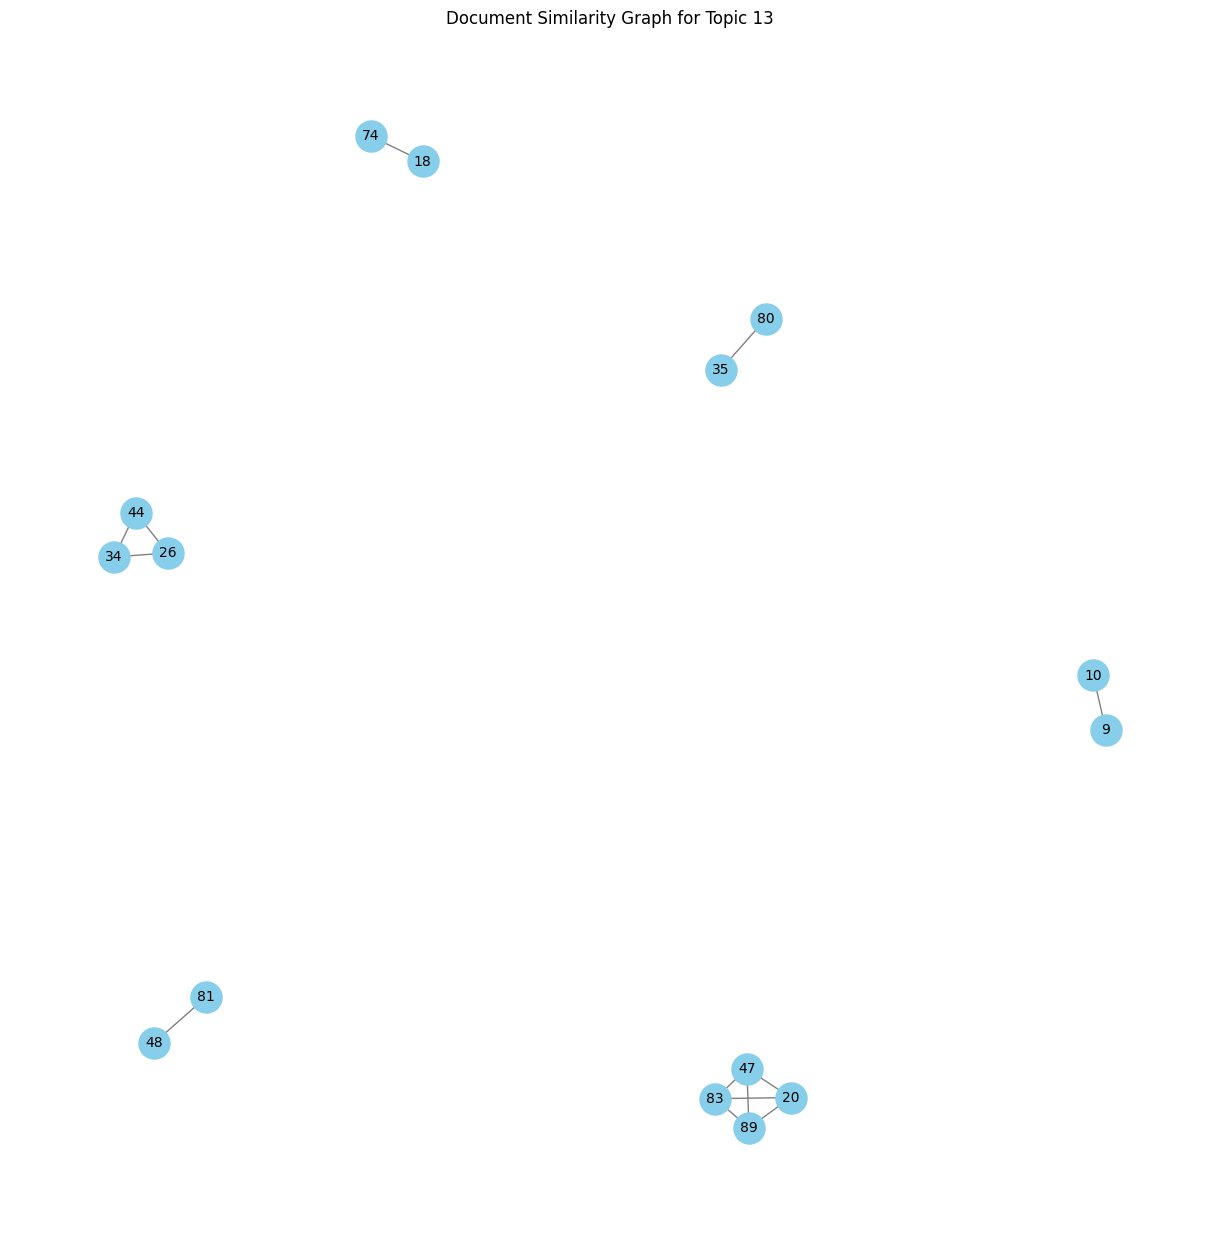

Documents related to Topic 14:

Document 1: Goals before I was born..Beckham❤❤

Document 2: Their tech keeps all my deposits safe and makes withdrawing winnings easy as pie

Document 3: I think Micah would have loved the T shirt that t shirt is very special

Document 4: Mike Judge.

Document 5: Why are you wearing a jacket while Beckham is in a tee shirt ???

Document 6: Thompson Margaret Harris Timothy Harris Ruth

Document 7: i wonder if that statue would be worth anything today

Document 8: Ur bride was trying to pull focus on her wearing purple on her wedding

Document 9: Why is she wearing a welding apron?

Document 10: Classic!

Document 11: I liked ripd tho

Document 12: Eeee época boa...

Document 13: well boltneck was a master piece😊

Document 14: Dream life

Document 15: Go easy on the plastic surgery , golden balls 😊

Document 16: 누구도 날 막지못해!! 알리스타 쿵쾅 찍으로 빨리오셈 꼼 to the 프 to the 라카

Document 17: 꼼n프 라n카 소식들었어요? 앞으로 미래를 이끌어갈 레전드 온카라고 하던데요 ?

Document 18: KdB

Document 19: 베컴에게

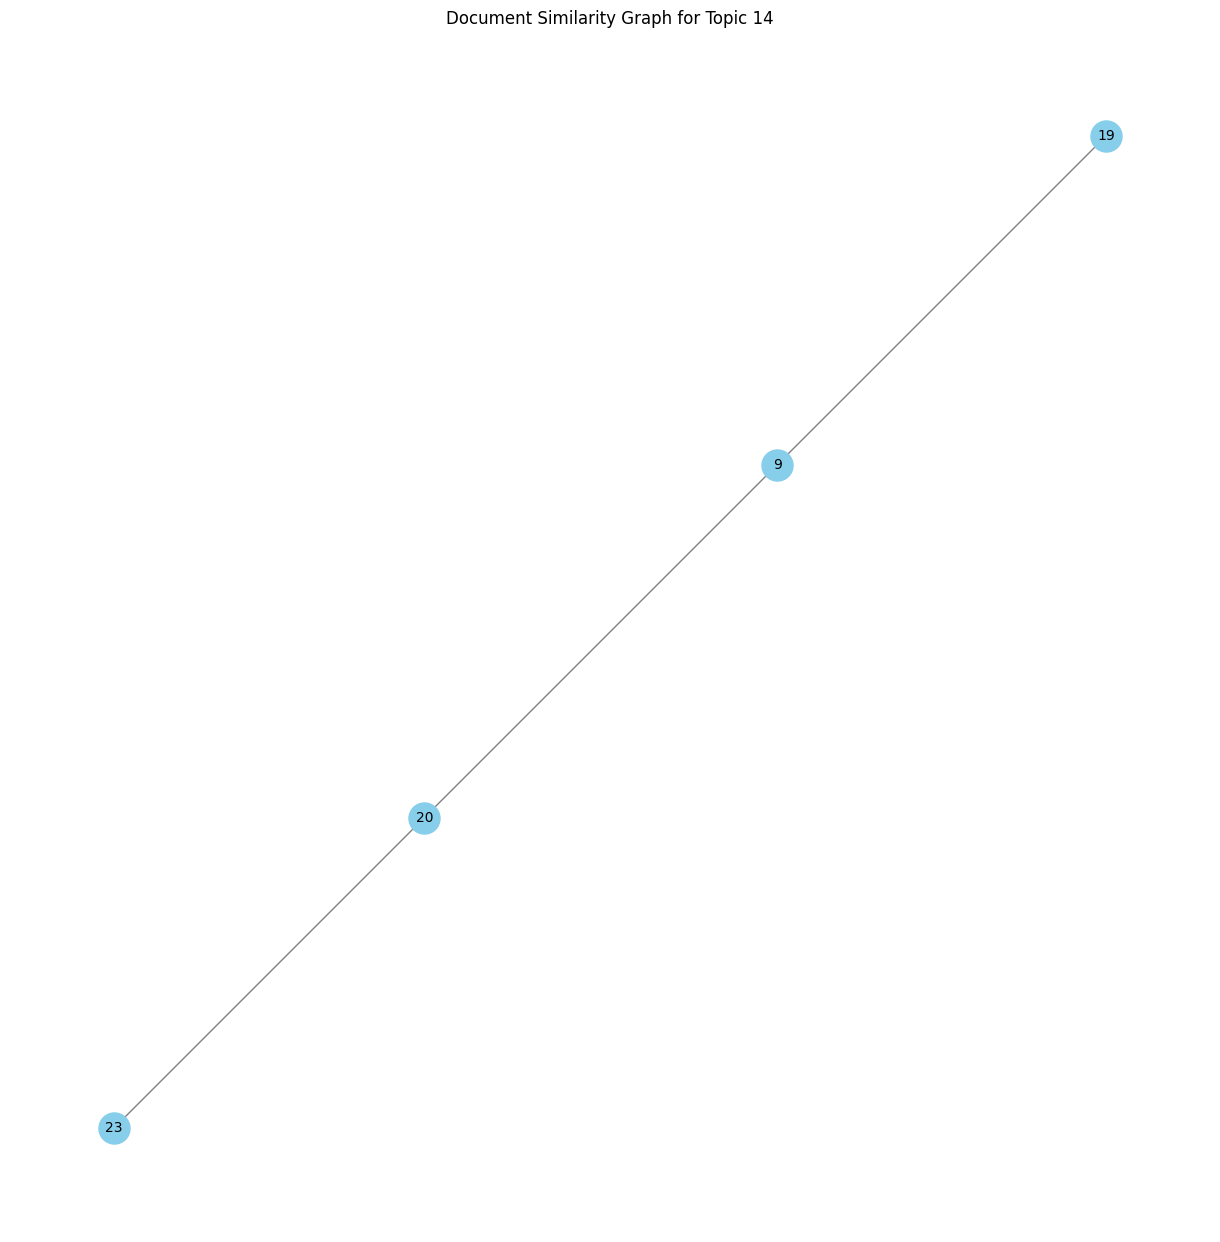

Documents related to Topic 15:

Document 1: Oh nice! I was actually looking at their welcome bonus. It&#;s pretty generous. Got some extra cash to play with

Document 2: Allen Jason Anderson Jennifer Anderson Margaret

Document 3: It&#;s funny how he became so famous outside the pitch, that he somehow got underrated as a footballer

Document 4: Got to love Beckham. I did some Arborist work outside his house in London on a very hot day and he sent ice cold bottles of san pelegrino water out to us, then walked over and had a chat. He’s a really nice guy.

Document 5: Bend it like Beckham.

Document 6: Beckham looks like beavis in this 😅

Document 7: She’s got no control over her emotions gets excited at every chance and interrupts the man! Let beckham speak!!

Document 8: Beckham is that guy everyone wants to be like... cool, composed,

Document 9: I like this.

Document 10: What a romantic guy he is. 😊

Document 11: He really looks a cool guy and a fantastic former  football player.

Do

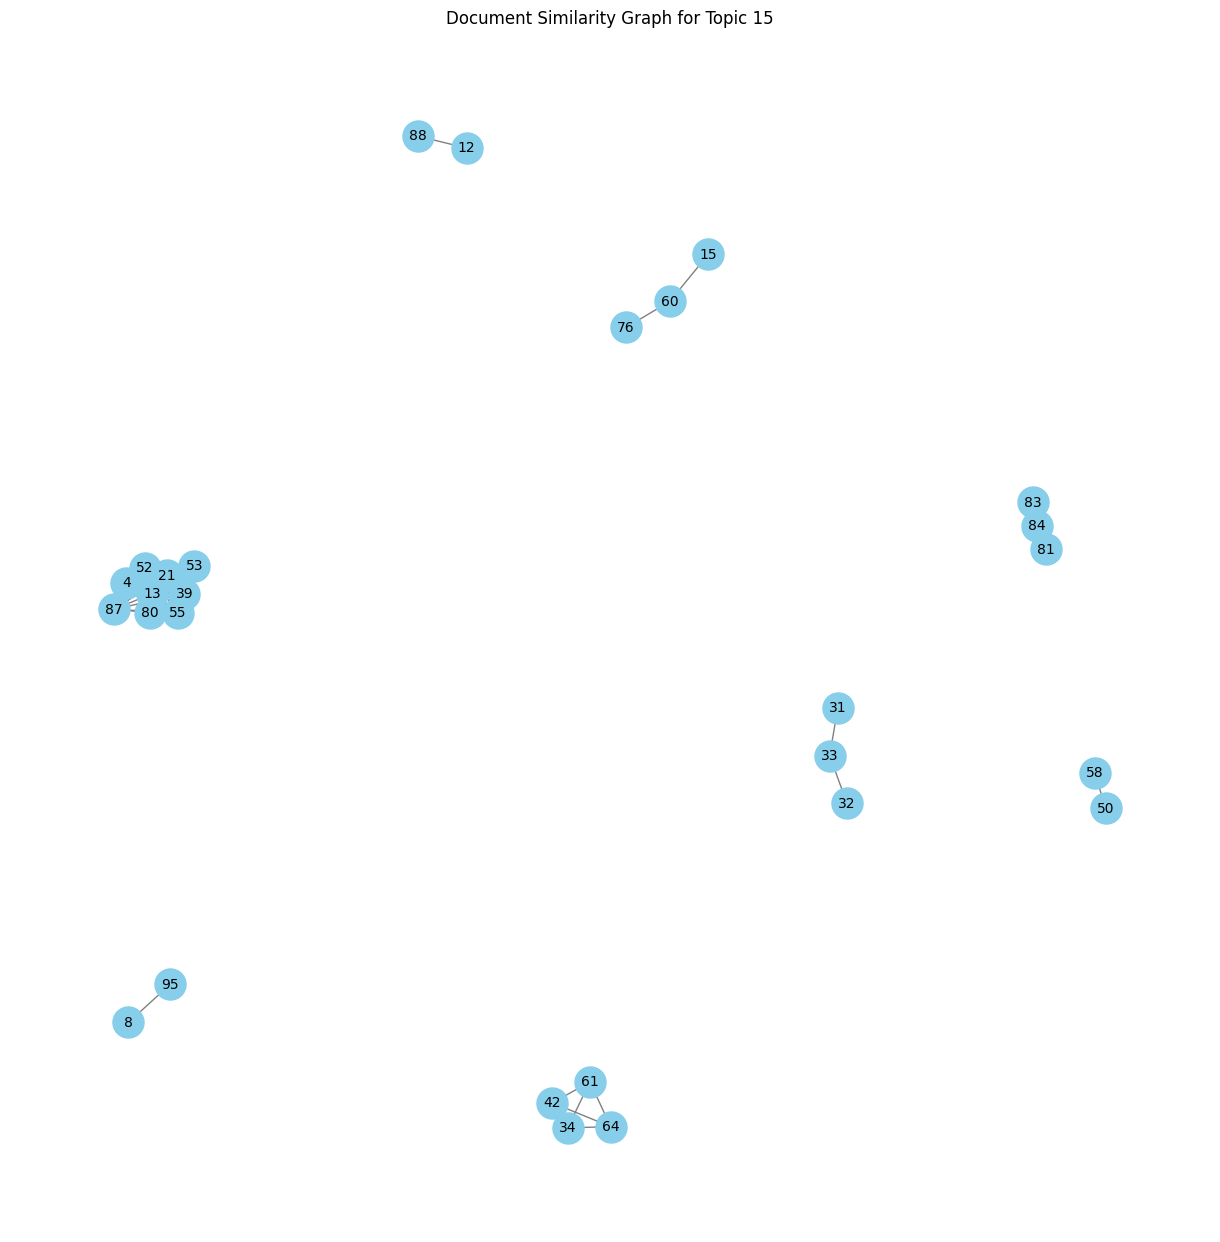

Documents related to Topic 16:

Document 1: Stick with ra if you like your bets fair and your winnings even fairer.

Document 2: Nothing beats the thrill of betting with ra, where the odds are always fair.

Document 3: Verifying my account with ra was a breeze, security questions were smart but easy

Document 4: If only his kids had his talent

Document 5: Micah is like a kid seeing his hero

Document 6: David&#;s sticky stuff 😆

Document 7: Never mind the shirt, I want a DB sticky stuff.

Document 8: Why DB doesn’t want Micah and Carra to the show ? If cbs crew is important enough for DB to visit, the same must apply to the other way round.

Document 9: Micah was given sticky stuff i think he already had his own after that reaction to Beckham

Document 10: how can you not like DB &lt;

Document 11: Hernandez Sarah Hernandez Jennifer Jones Anthony

Document 12: I’m not seeing what the hype is about with him

Document 13: Znakomity piłkarz 👍😊👏👏wielki talent 😊

Document 14: Memories 😂

D

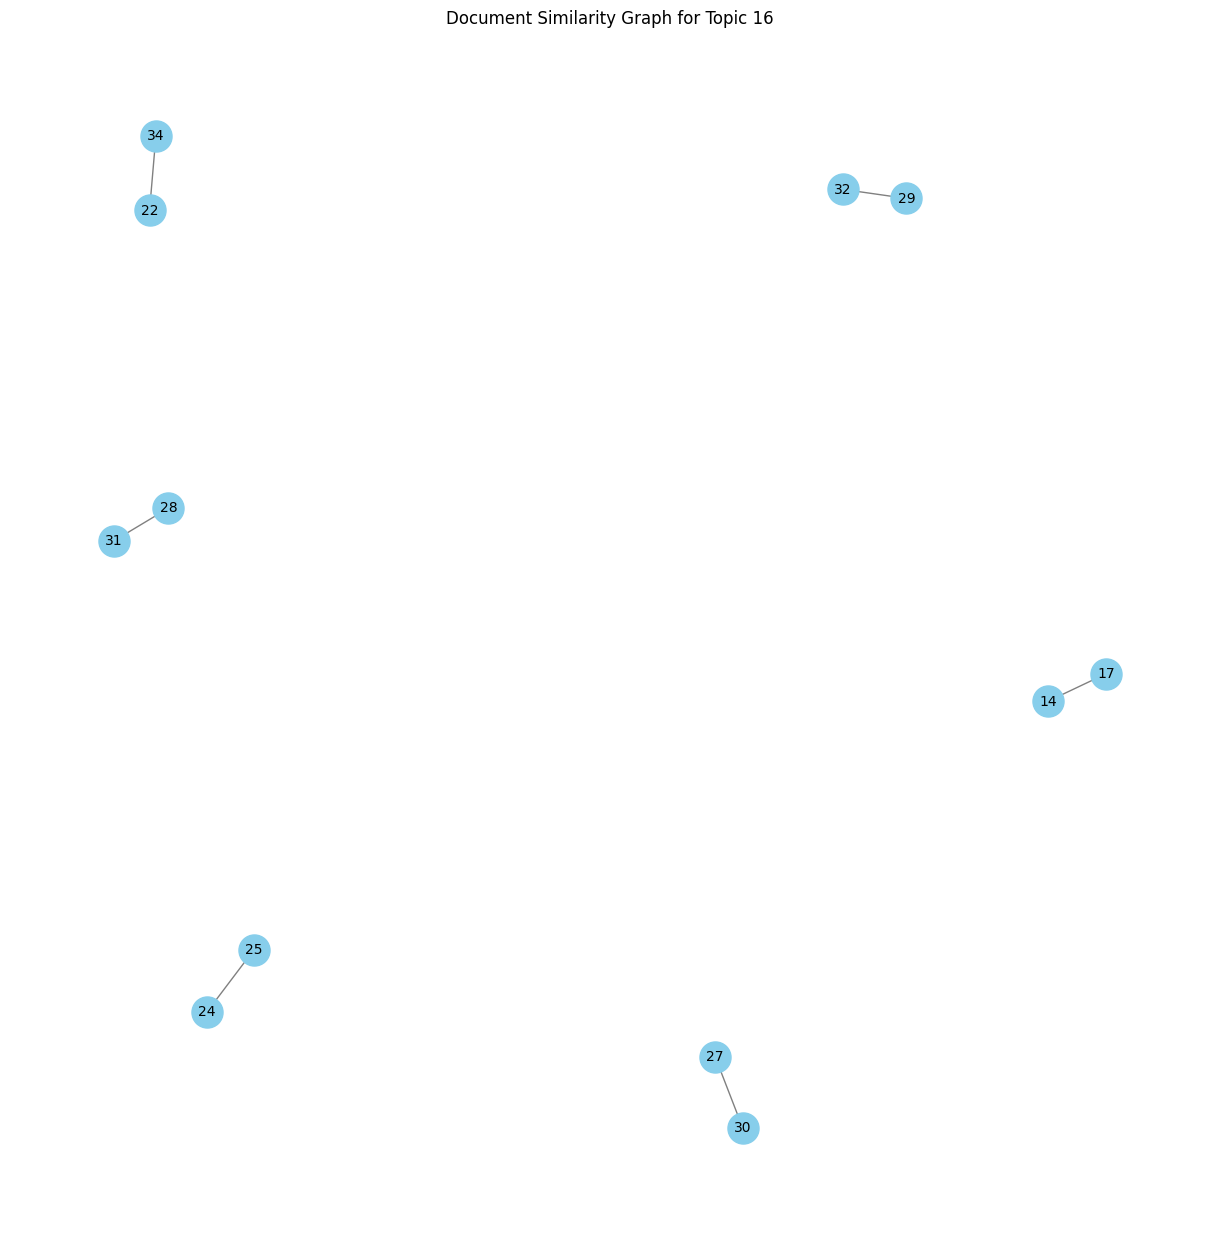

Documents related to Topic 17:

Document 1: Favourite David Beckham goal?

Document 2: “If anyone can go to the Brazilian national team it’s got to be David Beckham,”

Document 3: Never a delay in bet recalculations at ra, they keep it so professional

Document 4: When i was kid he was and still he is my favourite he looks like a super  model  ...all time fav of mine ❤❤

Document 5: The time when Daivid was in MANU and RM .....it was best time to watch many legends ......

Document 6:  UCL Winners And  UCL Dreamers 🤣🤣🤣

Document 7: soo beckham can talk....its first time i hear him saying thing

Document 8: Who is ypur favorite on the show David?😂😂😂😂😂

Document 9: Meeks deserves the kind of money that pays for those cuts, and whoever grouped these folk

Document 10: Meeks deserves the kind of money that pays for those cuts, and whoever grouped these folk

Document 11: I’ll bet one of the A-listers for Beckham’s show is Tom Cruise, as he watched him playing for Madrid and he’s friends wi

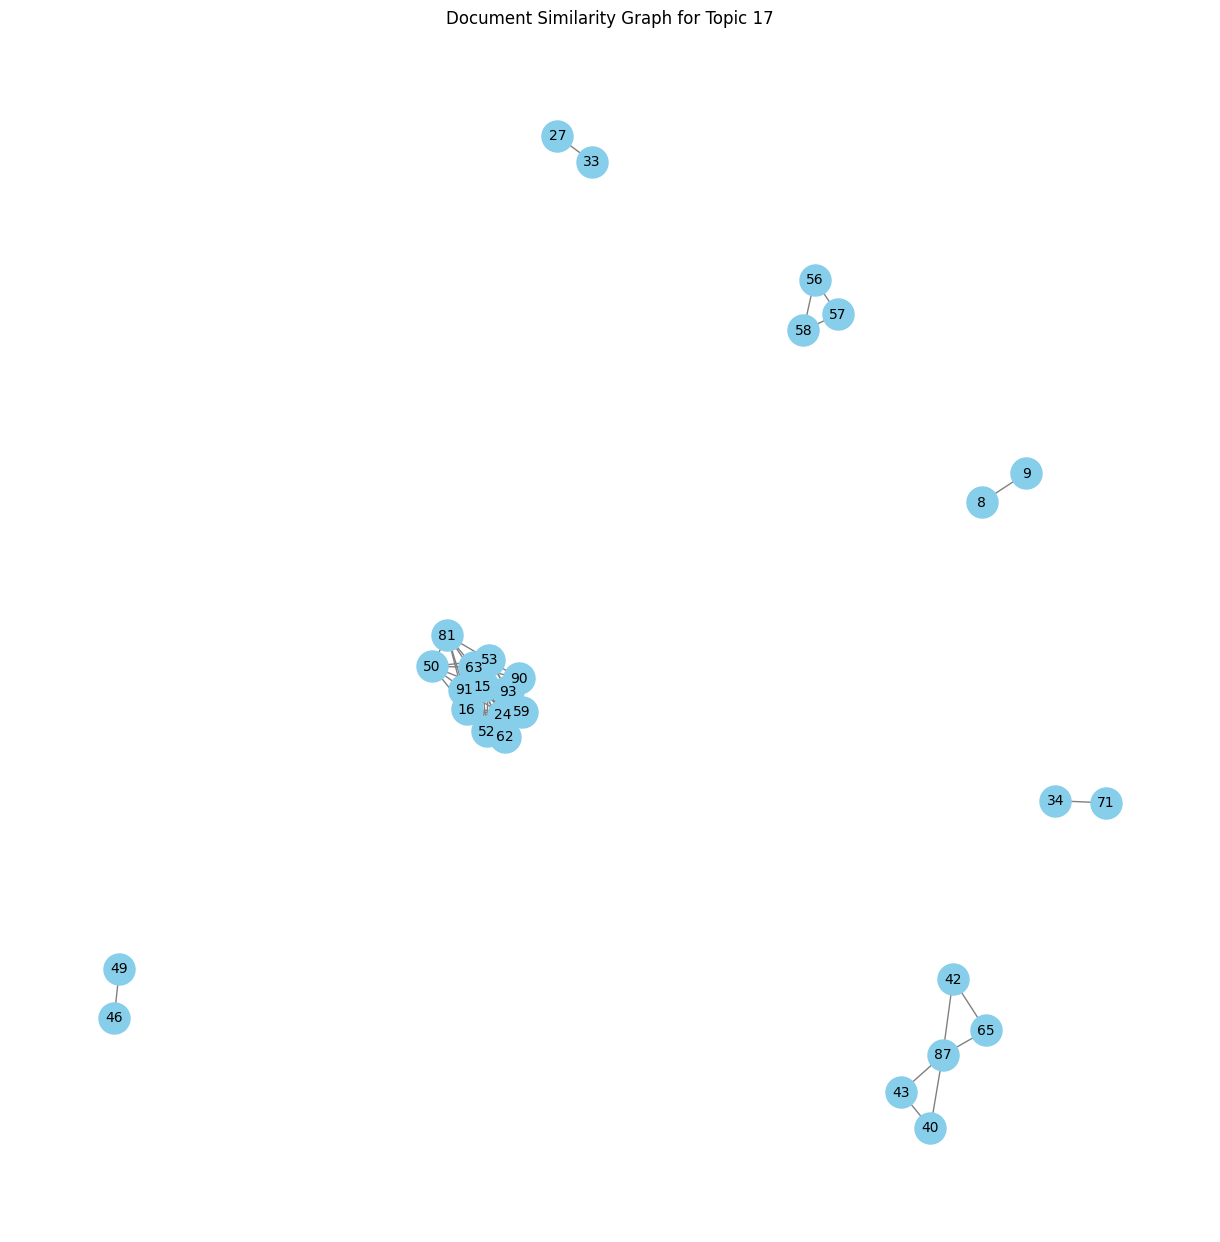

Documents related to Topic 18:

Document 1: GOAT

Document 2: I would bravely tell you that if this panel were composed of ONLY Britons, it could have been tasteless, biased, and even collapsed and closed upon its commencing 💯✍️<br>Hello <a href="http://www.youtube.com/results?search_query=%abdo">#Abdo</a>, <a href="http://www.youtube.com/results?search_query=%tt">#TT</a> and <a href="http://www.youtube.com/results?search_query=%micah">#Micah</a><br>🇸🇴🇸🇴🇸🇴🇸🇴🇸🇴🇸🇴🇸🇴🇸🇴🇸🇴🇸🇴🇸🇴🇸🇴

Document 3: The eyes would be the second worst? What are talking about😂

Document 4: The GOAT

Document 5: “Are you aware of how popular he is?”<br>Jimmy who do you think you’re talking to?!?!!

Document 6: One goat talking about another goat

Document 7: Wohlbefinden ist mir sehr wichtig <br>Ein Wort würde mich schon umbringen <br>Wenn etwas wertvolles eventuell traurig ist oder passiv aggressiv aus anderen Emotionen

Document 8: Worst recommendation ever!!!

Document 9: 데이비드 베컴 he is goat

Document 10: It should 

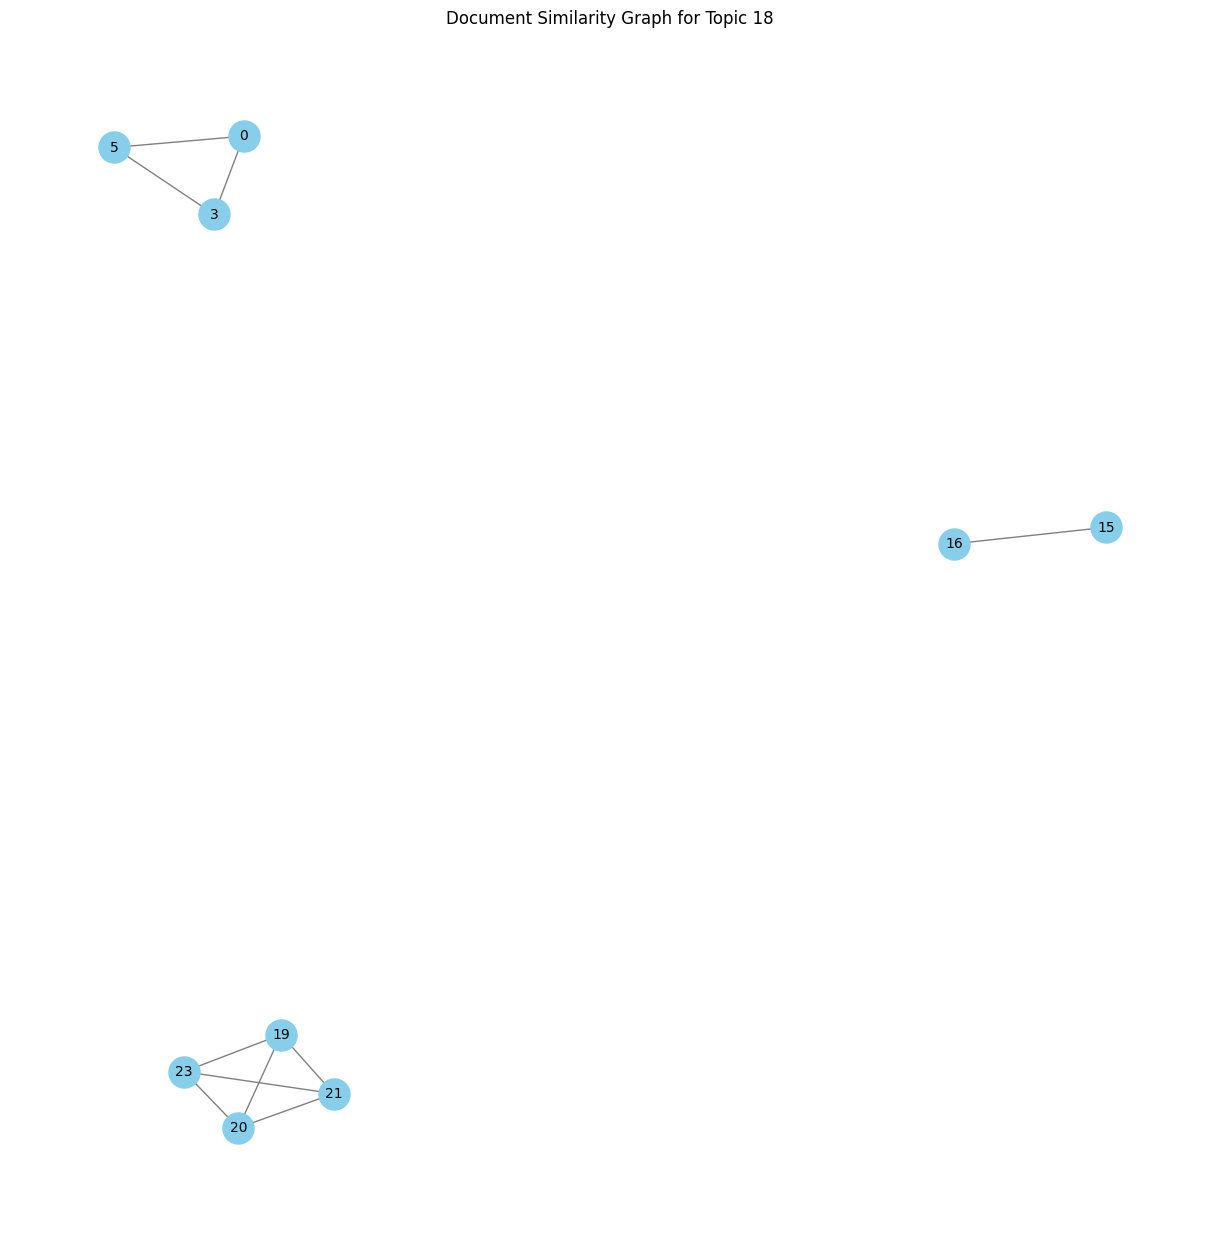

Documents related to Topic 19:

Document 1: Awesome I&#;ll log in this weekend then. Have you joined any of the live game shows? They&#;re a blast and have unique bonuses

Document 2: Stella 🇧🇪

Document 3: Stella Artois events? What were those?

Document 4: He is awesome

Document 5: The acting alone gives it away, people. Jesus f christ, critical thinking is dead. Ya&#;ll straight dumb for not realizing this was shot to be a pepsi commercial. Use yer heads.

Document 6: pepsi 😂

Document 7: That was an awful acting from all sides, all of this was arranged.

Document 8: When the queen died he got in the line to visit her like everyone else other celebs used the fame to go straight in

Document 9: Bananas straight to your door step

Document 10: R.I.P.D was awesome

Document 11: Complete sellout

Document 12: 도파민이 가득차는 소리가 여기까지 들림 ㅋㅋ 꼼프라까 에서 도파민 충전 ㄱㄱ

Document 13: 꼼프라~카 당신은 그저 저에게 빛.. 그자체 입니다… 새로운 인생을 주셔서 감사합니다잇

Document 14: 꼼프라~카.. 이름 완전 촥촥 감기네잉 일단 시작을해봐 그럼 반이라도 먹고 들어감. ㅋ

Document 

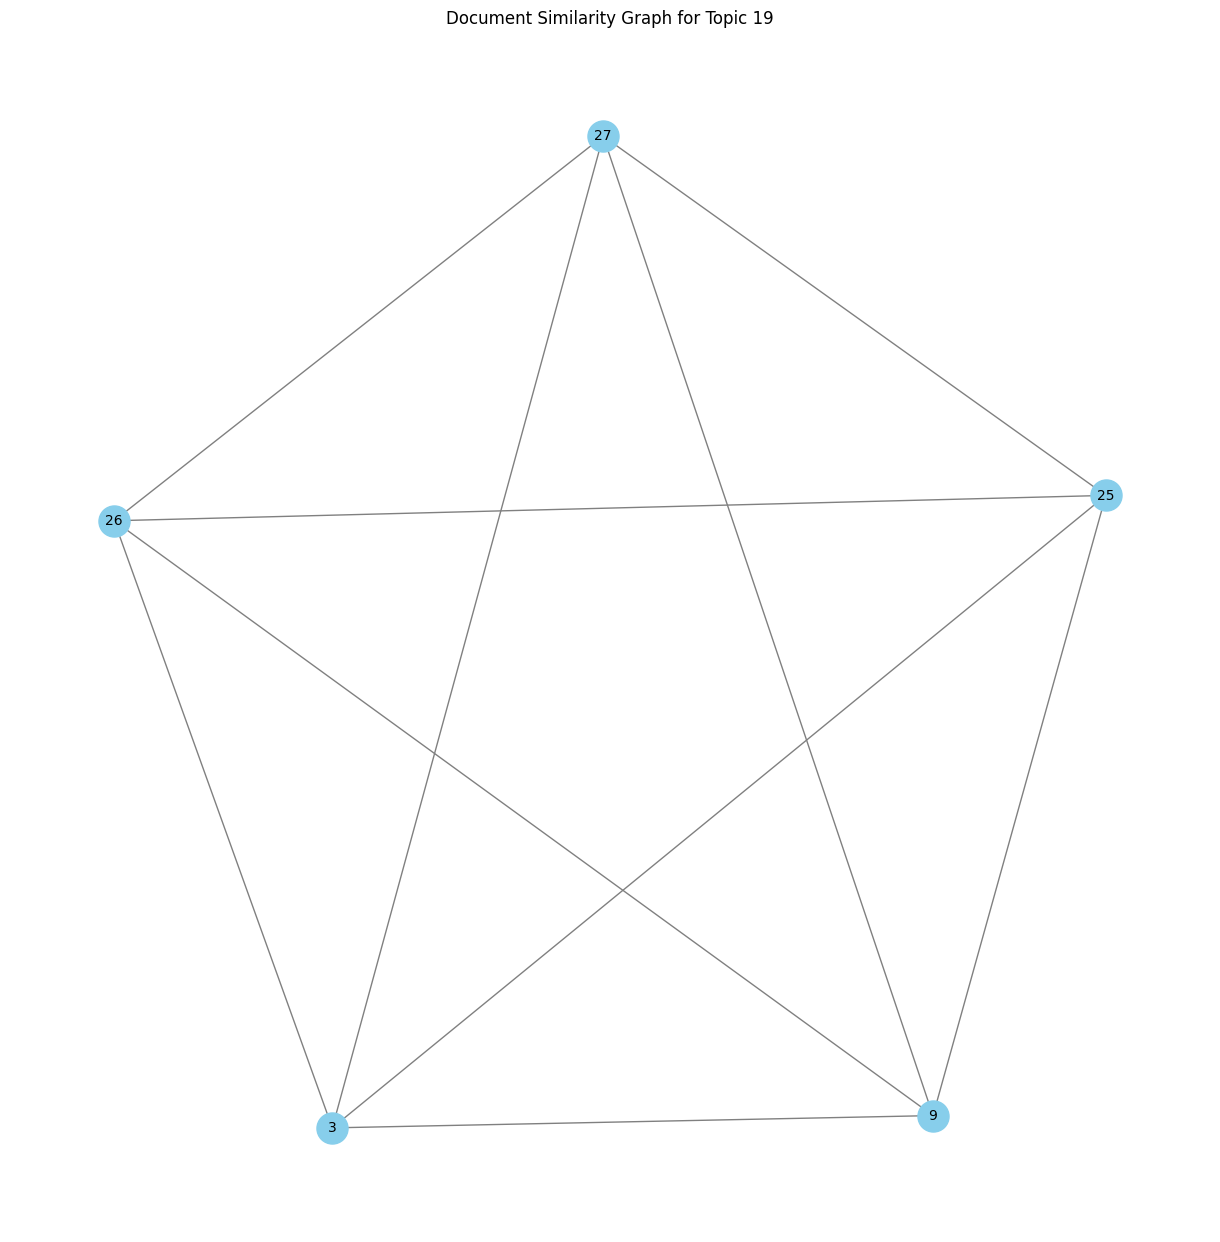

In [34]:
# Import necessary libraries
import numpy as np
import networkx as nx
from networkx.algorithms import community
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

threshold = 0.5
doc_topic_dist = ldaModel.transform(tf)
# Iterate over each topic
for topic_idx in range(ldaModel.n_components):
    # Extract documents related to the current topic
    related_docs_indices = np.where(doc_topic_dist[:, topic_idx] > threshold)[0]
    related_docs = [lPosts[i] for i in related_docs_indices]

    # Print the related documents
    print(f"Documents related to Topic {topic_idx}:\n")
    for idx, doc in enumerate(related_docs):
        print(f"Document {idx + 1}: {doc}\n")

    # Perform community analysis
    # Step 1: Vectorize the related documents using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(related_docs)

    # Step 2: Compute cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(tfidf_matrix)

    # Step 3: Create a graph from the cosine similarity matrix
    G = nx.Graph()
    for i in range(len(related_docs)):
        for j in range(i + 1, len(related_docs)):
            if cosine_sim_matrix[i, j] > 0.6:
                G.add_edge(i, j, weight=cosine_sim_matrix[i, j])

    # Step 4: Detect communities using the Girvan-Newman method
    communities_generator = community.girvan_newman(G)  # Call girvan_newman directly from the community module
    top_level_communities = next(communities_generator)
    sorted_communities = sorted(map(sorted, top_level_communities))

    # Print the communities
    print(f"Communities for Topic {topic_idx}:\n")
    for idx, community_list in enumerate(sorted_communities):  # Renamed 'community' to 'community_list' to avoid name conflict
        print(f"Community {idx + 1}:")
        for doc_idx in community_list:
            print(f"Document {doc_idx + 1}: {related_docs[doc_idx]}")
        print("="*80)  # Separator between communities

    # Export the graph to a GEXF file for Gephi
    nx.write_gexf(G, f"youtube_document_similarity_graph_topic_{topic_idx}.gexf")

    # Visualize the graph and save it as an image
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
    plt.title(f"Document Similarity Graph for Topic {topic_idx}")
    plt.savefig(f"youtube_document_similarity_graph_topic_{topic_idx}.png")  # Save the graph as an image
    plt.show()

## Combine Topics for Community Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Communities for Combined Topics 

Community 1:
Document 4: This is fantastic!😅😅😅
Document 30: fantastic
Community 2:
Document 7: Micah and Jamie are hilarious 🤣🤣
Document 18: That was hilarious.
Community 3:
Document 17: LoL🤣🤣🤣🤣
Document 31: and your  lol
Community 4:
Document 25: Micah 🎉
Document 26: Micah is melting 😂
Document 27: Micah is nauseating.
Community 5:
Document 34: He literally always kicks it to the right of the goalie 😂
Document 72: Literally
Community 6:
Document 38: He is the Roberto Carlos of England🥶
Document 55: Is that Roberto Carlos or r?
Community 7:
Document 42: Insanely great
Document 57: Great champion
Document 73: Great 👍 ❤
Community 8:
Document 49: Never seen Ms. Posh smile or laugh b.
Document 50: First I seen her smile . And laugh 😮
Document 61: Who seen 
Community 9:
Document 65: song ?
Document 66: Song?
Document 69: song name
Community 10:
Document 77: Fella was brilliant
Document 94: That’s brilliant ❤
Document 96: Brilliant.well done to all involved


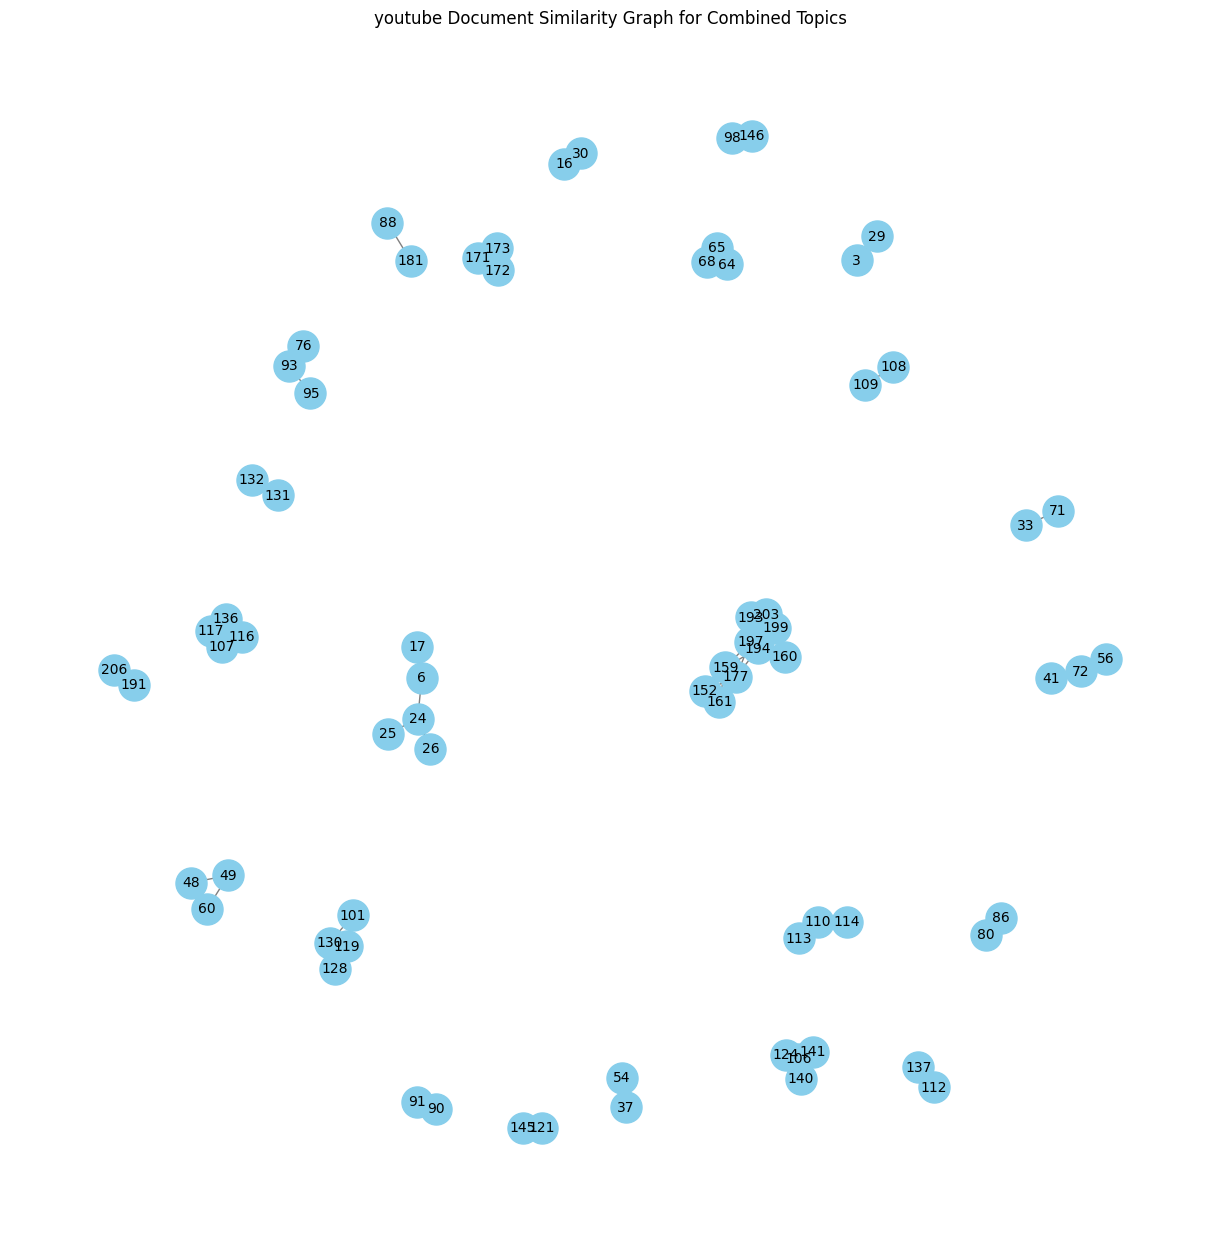

In [35]:
# Define a threshold for considering a document as related to a topic
threshold = 0.5
doc_topic_dist = ldaModel.transform(tf)

# Define the topics of interest
topics_of_interest = [0, 5, 6, 7, 11]

# Extract and combine documents related to the specified topics
combined_docs = []
for topic_idx in topics_of_interest:
    # Extract documents related to the current topic
    related_docs_indices = np.where(doc_topic_dist[:, topic_idx] > threshold)[0]
    related_docs = [lPosts[i] for i in related_docs_indices]
    combined_docs.extend(related_docs)

# # Print the combined documents
# print("Combined Documents from Topics 10, 7, and 17:\n")
# for idx, doc in enumerate(combined_docs):
#     print(f"Document {idx + 1}: {doc}\n")

# Perform community analysis on the combined documents
# Step 1: Vectorize the combined documents using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(combined_docs)

# Step 2: Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Step 3: Create a graph from the cosine similarity matrix
G = nx.Graph()
for i in range(len(combined_docs)):
    for j in range(i + 1, len(combined_docs)):
        if cosine_sim_matrix[i, j] > 0.5:
            G.add_edge(i, j, weight=cosine_sim_matrix[i, j])

# Step 4: Detect communities using the Girvan-Newman method
communities_generator = community.girvan_newman(G)  # Call girvan_newman directly from the community module
top_level_communities = next(communities_generator)
sorted_communities = sorted(map(sorted, top_level_communities))

communities_to_remove = [16,21,24]
sorted_communities = [community for idx, community in enumerate(sorted_communities) if idx not in communities_to_remove]
# Print the communities
print("Communities for Combined Topics \n")
for idx, community_list in enumerate(sorted_communities):
    print(f"Community {idx + 1}:")
    for doc_idx in community_list:
        print(f"Document {doc_idx + 1}: {combined_docs[doc_idx]}")
    print("="*80)  # Separator between communities

# Export the graph to a GEXF file for Gephi
nx.write_gexf(G, "youtube_combined_document_similarity_graph.gexf")

# Visualize the graph and save it as an image
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
plt.title("youtube Document Similarity Graph for Combined Topics")
plt.savefig("youtube_combined_document_similarity_graph.png")  # Save the graph as an image
plt.show()